# Trace the DNA Pause Mode Raster Interrupts

These are the Vice monitor commands for doing this:
```
log on                            
logname "DNAModeInterrupts.txt"   
tr exec 0e08 0e08                 
command 1 "screenshot \"dna\" 2"  
```

In [1]:
routines = {
"0e08": "Main DNA Update",
}

routine_names = {
"0e08": "Main DNA Update",
}

Extract the notes played from the Vice X64 log file. We store them as a list with each element like `("Voice1", "C-3")`, i.e. (voice, note). We get the notes by mapping from the hi/lo bytes logged by x64 to the notes they indicated using `sid_to_note`, which we created above.

In [37]:
log_file = "IridisAlphaTitleScreenInterrupts.txt"
input_file = open(log_file,'r')
curr, curr_count, raster = "", 0, []
for l in input_file.readlines():
    address = l[16:20]

    if not address in routines:
        continue
    routine = routines[address]
    if "Finish" in routine:
        continue
    if address == curr:
        curr_count +=1
        raster += [l[23:26].strip()]
        continue
        
    if curr in routines:
        print(routines[curr], curr_count, raster)
        
    curr, curr_count, raster = address, 1, [l[23:26].strip()]


Starfield 12 ['017', '078', '084', '090', '096', '102', '108', '114', '120', '126', '132', '138']
Paint Gilbies 1 ['143']
Starfield 14 ['152', '174', '181', '186', '192', '198', '205', '210', '216', '222', '229', '234', '240', '246']
Mutate Starfield 1 ['256']
Title Text and Music 1 ['270']
Starfield 12 ['017', '078', '085', '090', '096', '102', '108', '114', '120', '126', '132', '138']
Paint Gilbies 1 ['143']
Starfield 14 ['152', '174', '180', '186', '192', '198', '205', '210', '216', '222', '228', '234', '240', '246']
Mutate Starfield 1 ['256']
Title Text and Music 1 ['270']
Starfield 12 ['017', '078', '085', '090', '096', '102', '108', '114', '120', '126', '132', '138']
Paint Gilbies 1 ['143']
Starfield 14 ['152', '174', '180', '186', '192', '198', '205', '210', '216', '222', '229', '234', '240', '246']
Mutate Starfield 1 ['256']
Title Text and Music 1 ['269']
Starfield 12 ['017', '078', '085', '090', '096', '102', '108', '114', '120', '126', '132', '138']
Paint Gilbies 1 ['143']
St

Starfield 14 ['152', '174', '181', '186', '192', '198', '204', '210', '216', '222', '228', '234', '240', '246']
Mutate Starfield 1 ['256']
Title Text and Music 1 ['270']
Starfield 12 ['017', '078', '085', '090', '096', '102', '108', '114', '120', '126', '132', '138']
Paint Gilbies 1 ['143']
Starfield 14 ['152', '174', '181', '186', '192', '198', '205', '210', '216', '222', '228', '234', '240', '246']
Mutate Starfield 1 ['256']
Title Text and Music 1 ['270']
Starfield 12 ['017', '078', '085', '090', '096', '102', '108', '114', '120', '126', '132', '138']
Paint Gilbies 1 ['143']
Starfield 14 ['152', '174', '181', '186', '192', '198', '205', '210', '216', '222', '229', '234', '240', '246']
Mutate Starfield 1 ['256']
Title Text and Music 1 ['267']
Starfield 12 ['017', '078', '085', '090', '096', '102', '108', '114', '120', '126', '132', '138']
Paint Gilbies 1 ['143']
Starfield 14 ['152', '174', '181', '186', '192', '198', '205', '210', '216', '222', '228', '234', '240', '246']
Mutate Starf

Mutate Starfield 1 ['256']
Title Text and Music 1 ['267']
Starfield 12 ['017', '078', '085', '090', '096', '102', '108', '114', '120', '126', '132', '138']
Paint Gilbies 1 ['143']
Starfield 14 ['152', '174', '180', '186', '192', '198', '205', '210', '216', '222', '229', '234', '240', '246']
Mutate Starfield 1 ['256']
Title Text and Music 1 ['269']
Starfield 12 ['017', '078', '085', '090', '096', '102', '108', '114', '120', '126', '132', '138']
Paint Gilbies 1 ['143']
Starfield 14 ['152', '174', '180', '186', '192', '198', '205', '210', '216', '222', '229', '234', '240', '246']
Mutate Starfield 1 ['256']
Title Text and Music 1 ['268']
Starfield 12 ['017', '078', '085', '090', '096', '102', '108', '114', '120', '126', '132', '138']
Paint Gilbies 1 ['143']
Starfield 14 ['153', '174', '180', '186', '192', '198', '205', '210', '216', '222', '229', '234', '240', '246']
Mutate Starfield 1 ['256']
Title Text and Music 1 ['269']
Starfield 12 ['017', '078', '085', '090', '096', '102', '108', '11

# Generate screen diagrams of rastering title screen

```
log on                            
logname "DNAModeInterrupts.txt"   
tr exec 0e08 0e08                 
command 1 "screenshot \"dna\" 2"  
```

Patch for vice:
```c
Index: src/monitor/monitor.c
===================================================================
--- src/monitor/monitor.c       (revision 42926)
+++ src/monitor/monitor.c       (working copy)
@@ -1105,6 +1105,7 @@
 void mon_screenshot_save(const char* filename, int format)
 {
     const char* drvname;
+    static int counter = 0;
 
     switch (format) {
         case 1:
@@ -1123,7 +1124,12 @@
             drvname = "BMP";
             break;
     }
-    if (screenshot_save(drvname, filename, machine_video_canvas_get(0))) {
+    char counter_string[16];
+    sprintf(counter_string, "%d", counter++);
+
+    const char* uniq_name;
+    uniq_name = util_concat(filename, counter_string, ".png", NULL);
+    if (screenshot_save(drvname, uniq_name, machine_video_canvas_get(0))) {
         mon_out("Failed.\n");
     }
 }

```

In [8]:
log_file = "DNAModeInterrupts.txt"
input_file = open(log_file,'r')
prev_program_counter = 0

routine_history = []
lines = input_file.readlines()
c = 0
prev_program_counter = 0
for i in range(4, len(lines), 3):
    address = lines[i][16:20]
    raster = lines[i][23:26].strip()
    program_counter = int(lines[i+1][69:77])
    cycles = program_counter - prev_program_counter
    
    routine = routine_names[address]
    routine_history += [(routine, raster, cycles, f"dna/dna{c}.png")]
    prev_program_counter = program_counter
    c += 1

In [9]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

def createGraph(img, ylabel, raster, label_size):
    fig, ax = plt.subplots(figsize=(20,20))
    ax.imshow(img, extent=(0,504,312,0))
    ax.set_ylabel("Rasterline Position", fontsize = 40)  

    ax.set_yticks([0,int(raster),312])
    ax.set_xticks([0,504])
    plt.yticks(fontsize=label_size)
    plt.xticks(fontsize=label_size)
    
    ax.set_xlabel(f"\n{ylabel}", fontsize = 45)  
    #ax.set_xlabel(r'\begin{center}X-axis\\*\textit{\small{' + label + r'}}\end{center}')
    return plt


In [10]:
routine_history[:10]

[('Main DNA Update', '48', 19978665, 'dna/dna0.png'),
 ('Main DNA Update', '54', 38, 'dna/dna1.png'),
 ('Main DNA Update', '63', 53, 'dna/dna2.png'),
 ('Main DNA Update', '71', 51, 'dna/dna3.png'),
 ('Main DNA Update', '79', 49, 'dna/dna4.png'),
 ('Main DNA Update', '87', 52, 'dna/dna5.png'),
 ('Main DNA Update', '95', 50, 'dna/dna6.png'),
 ('Main DNA Update', '103', 50, 'dna/dna7.png'),
 ('Main DNA Update', '111', 51, 'dna/dna8.png'),
 ('Main DNA Update', '119', 50, 'dna/dna9.png')]

<ipython-input-9-d79a2a26931f>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(20,20))


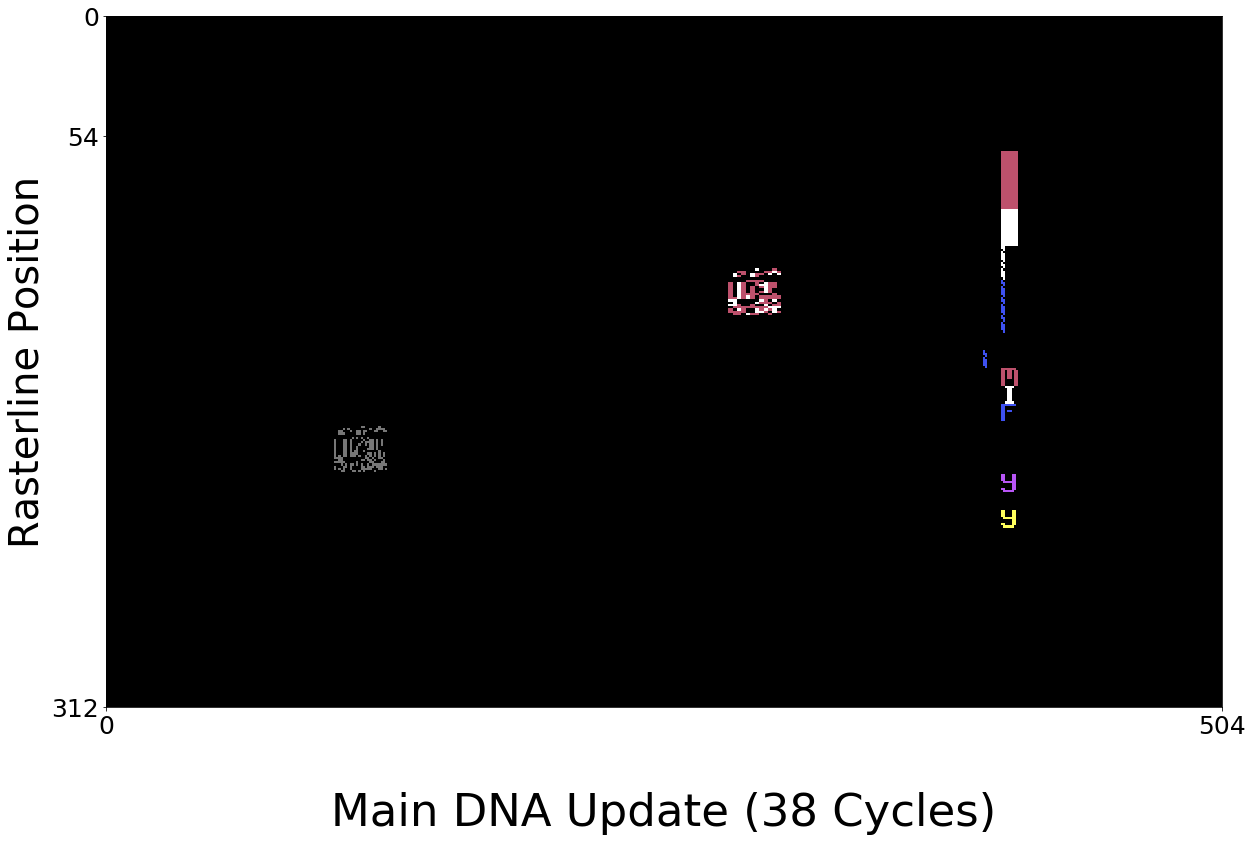

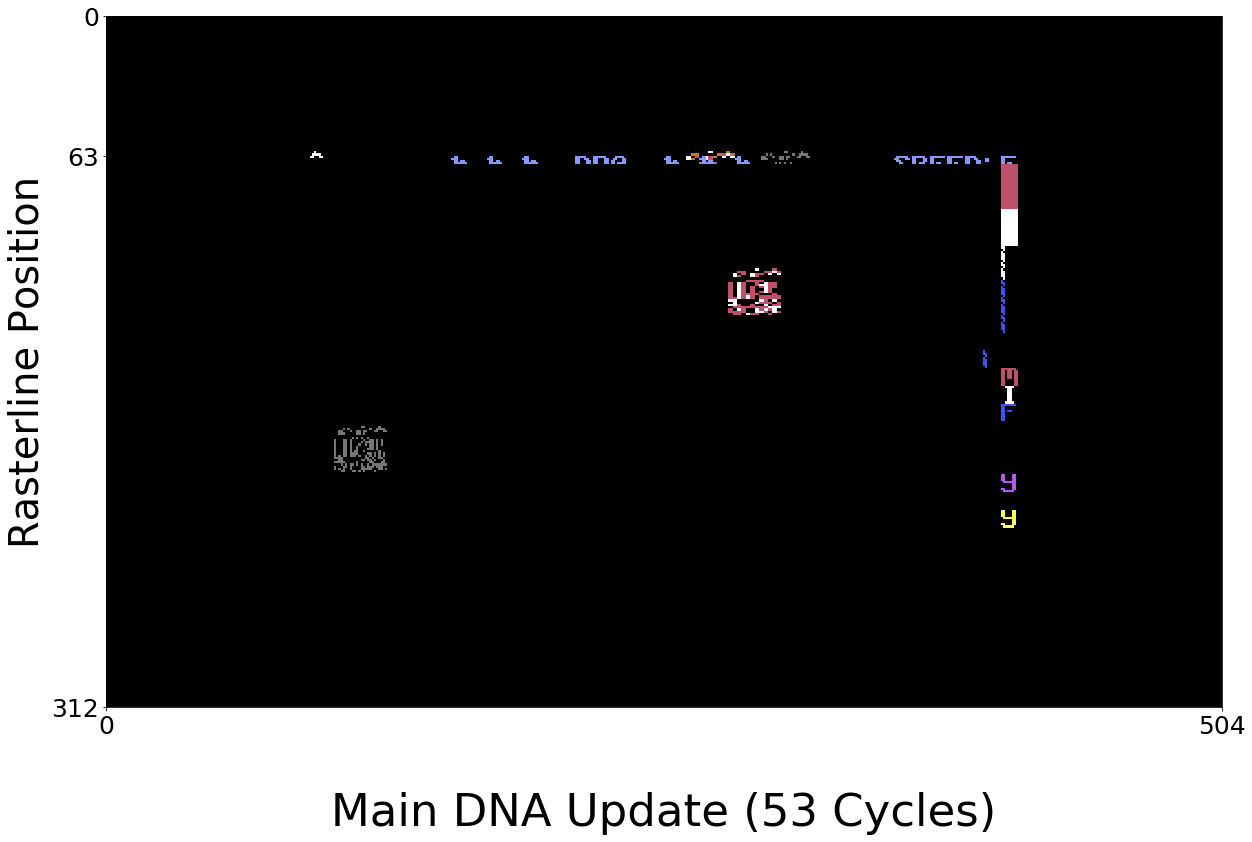

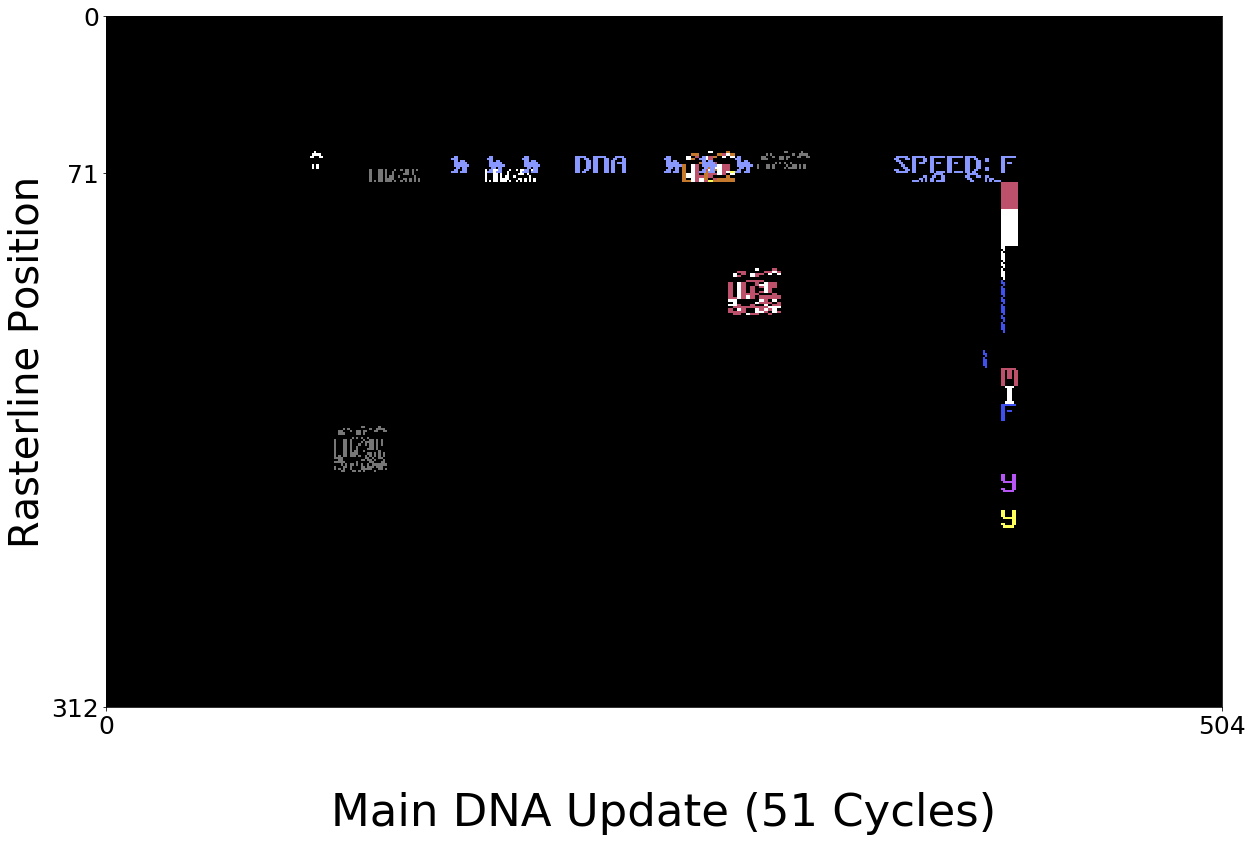

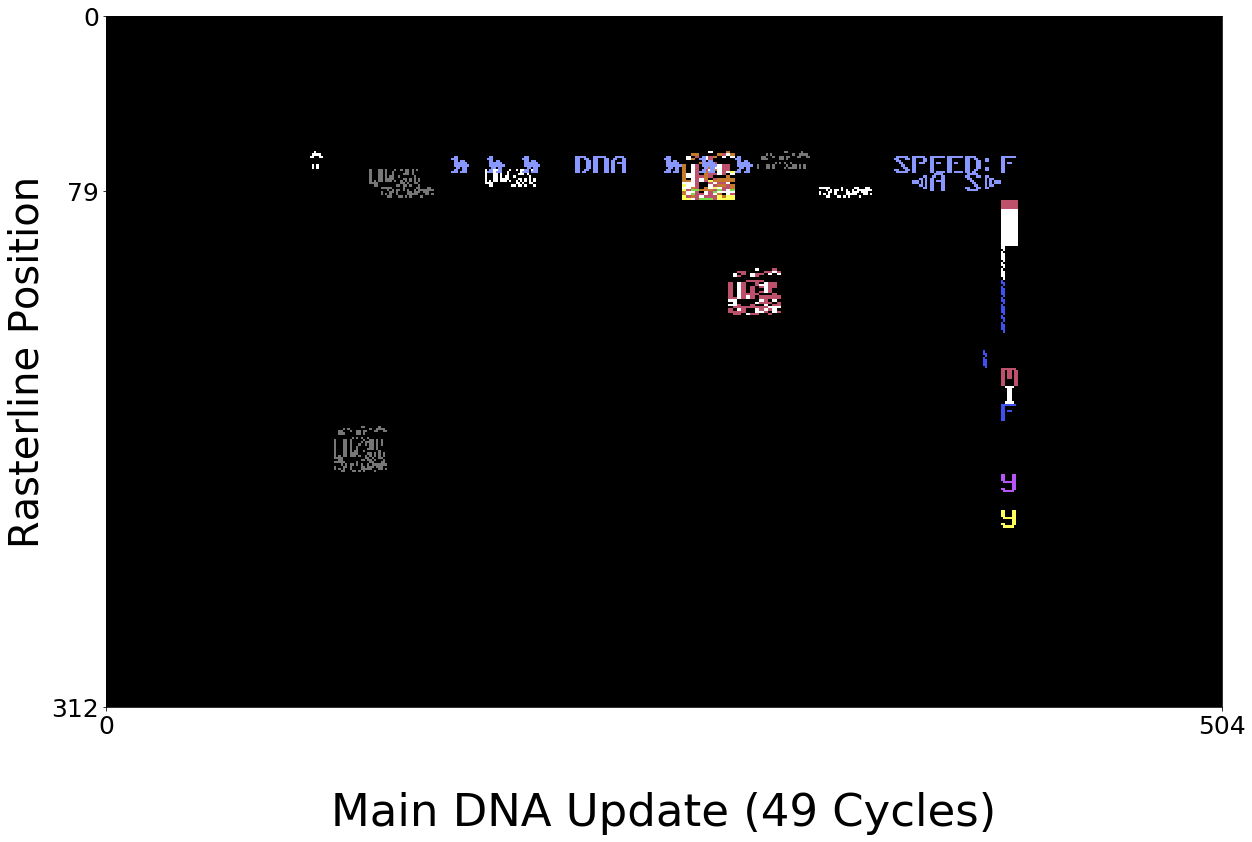

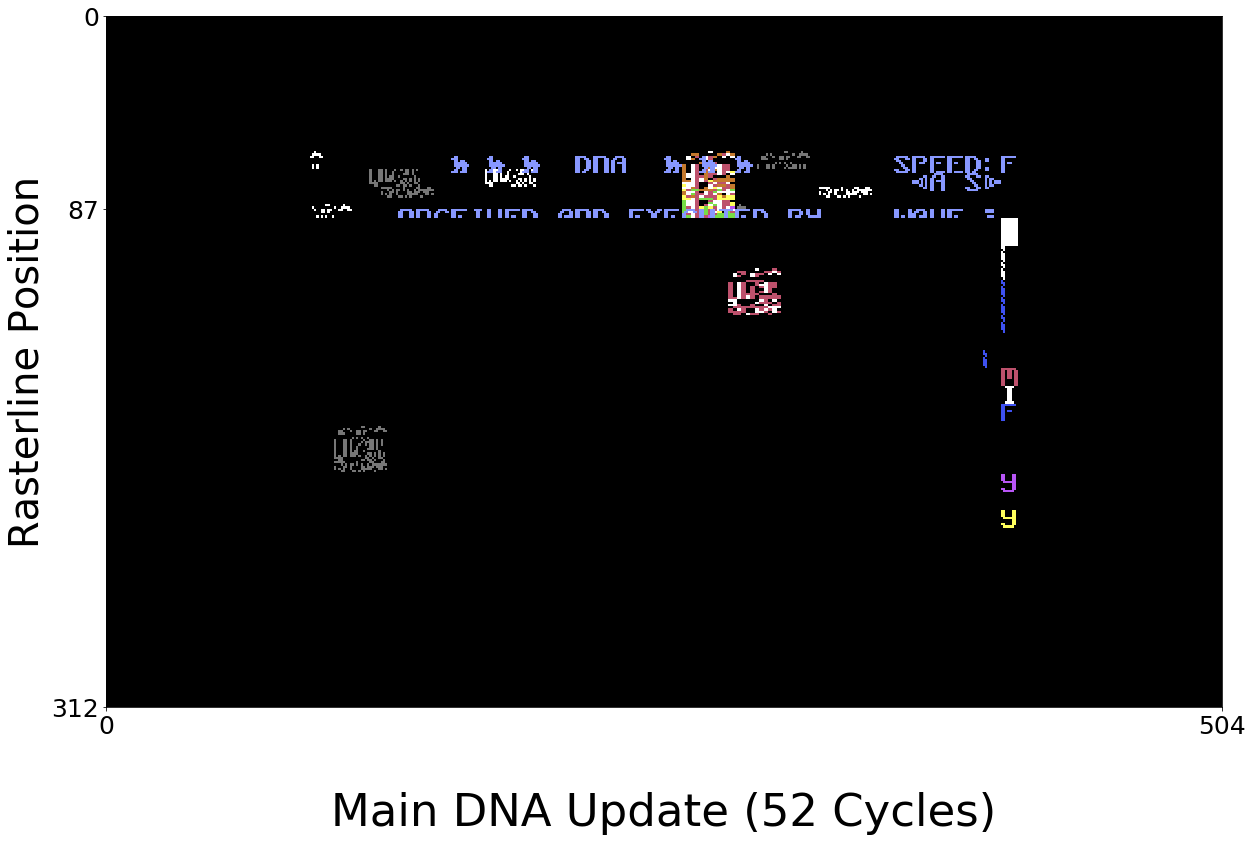

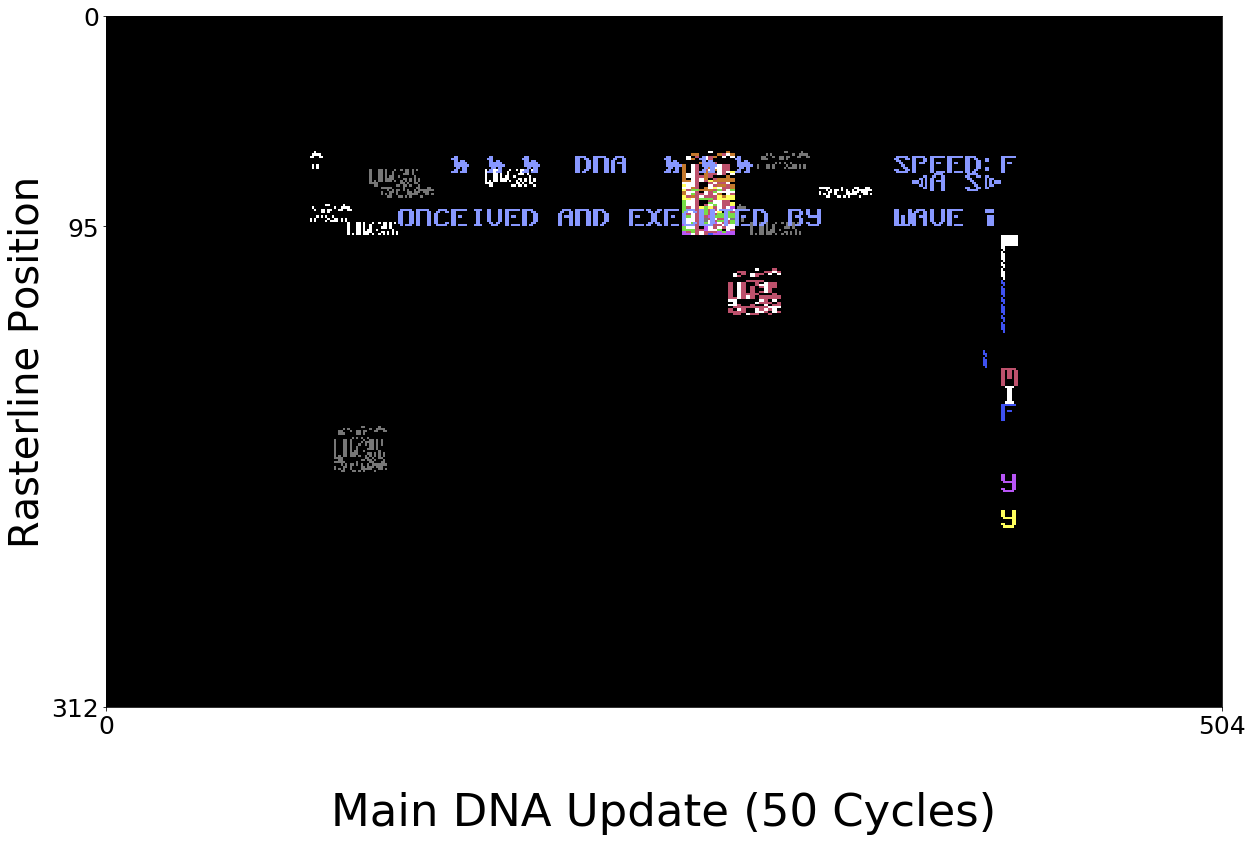

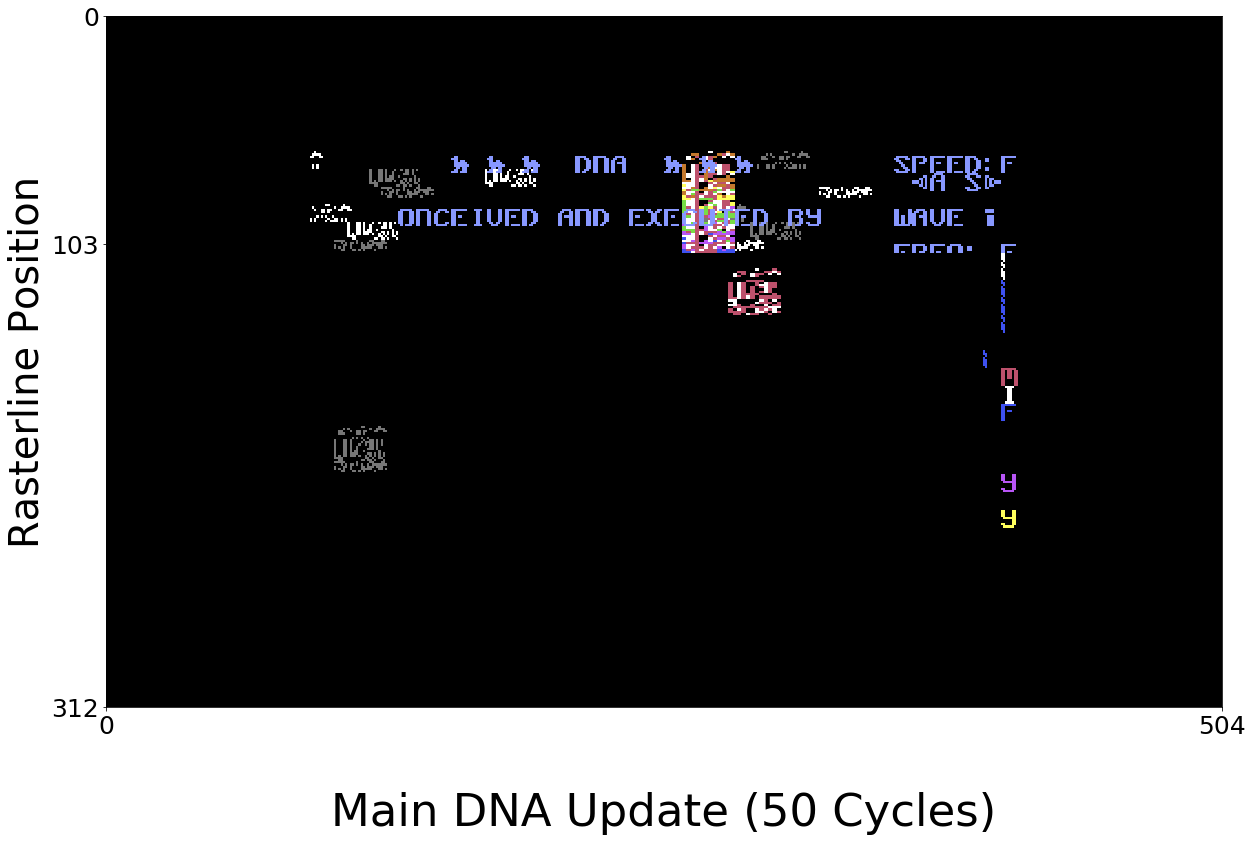

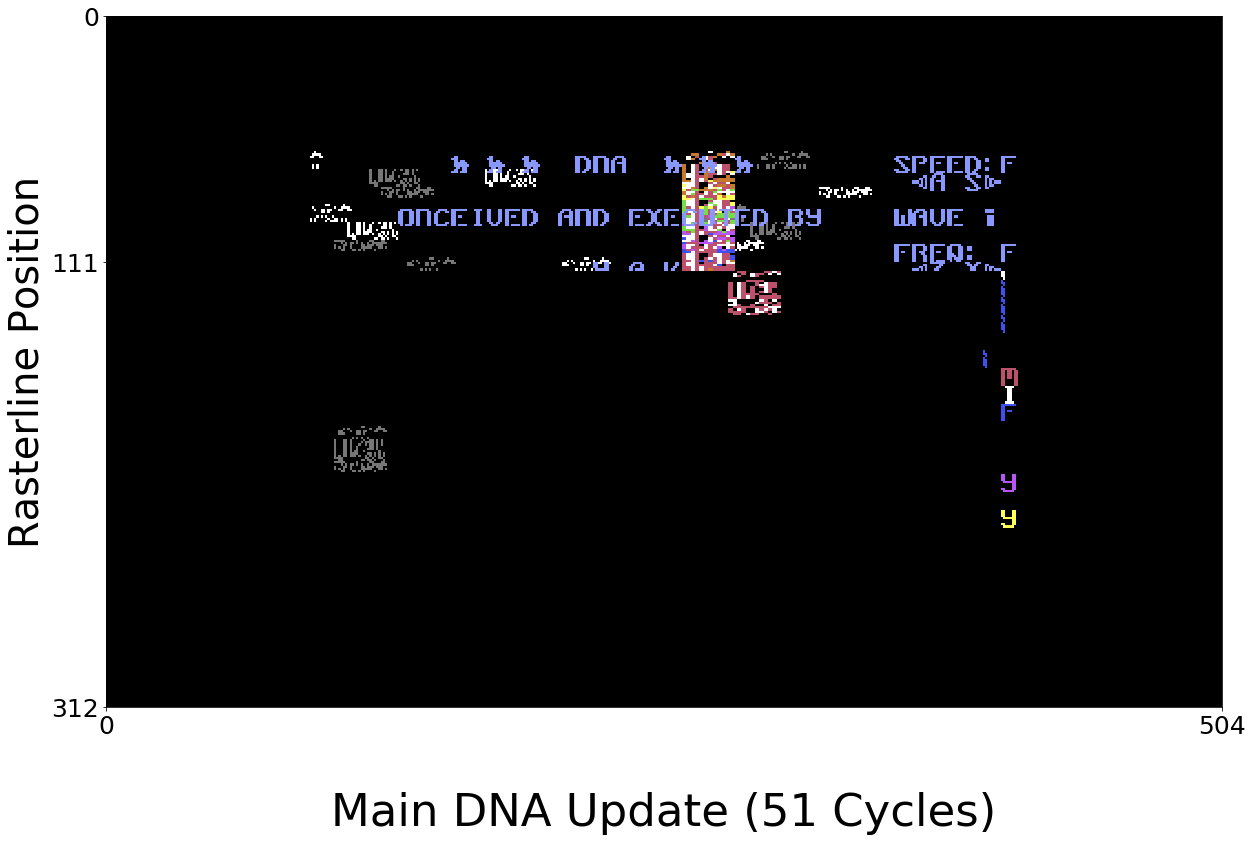

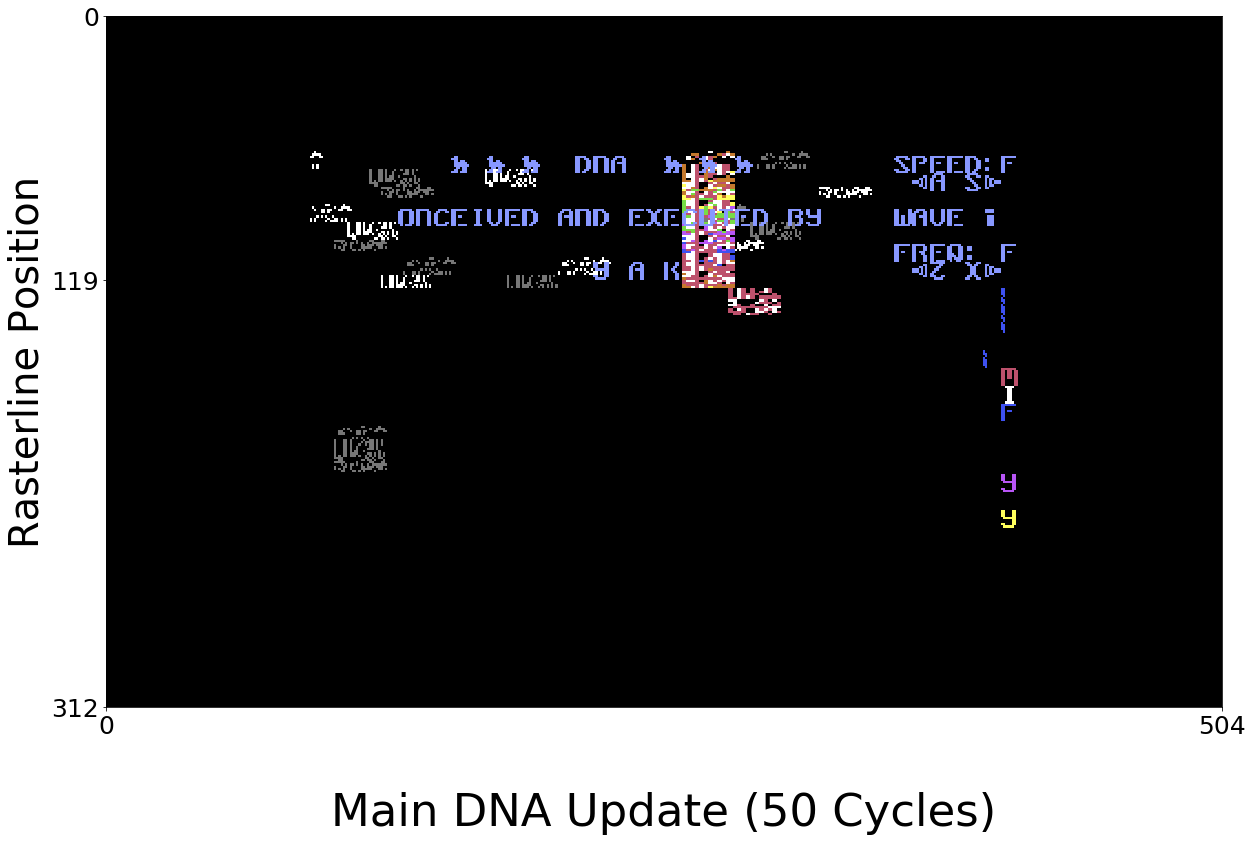

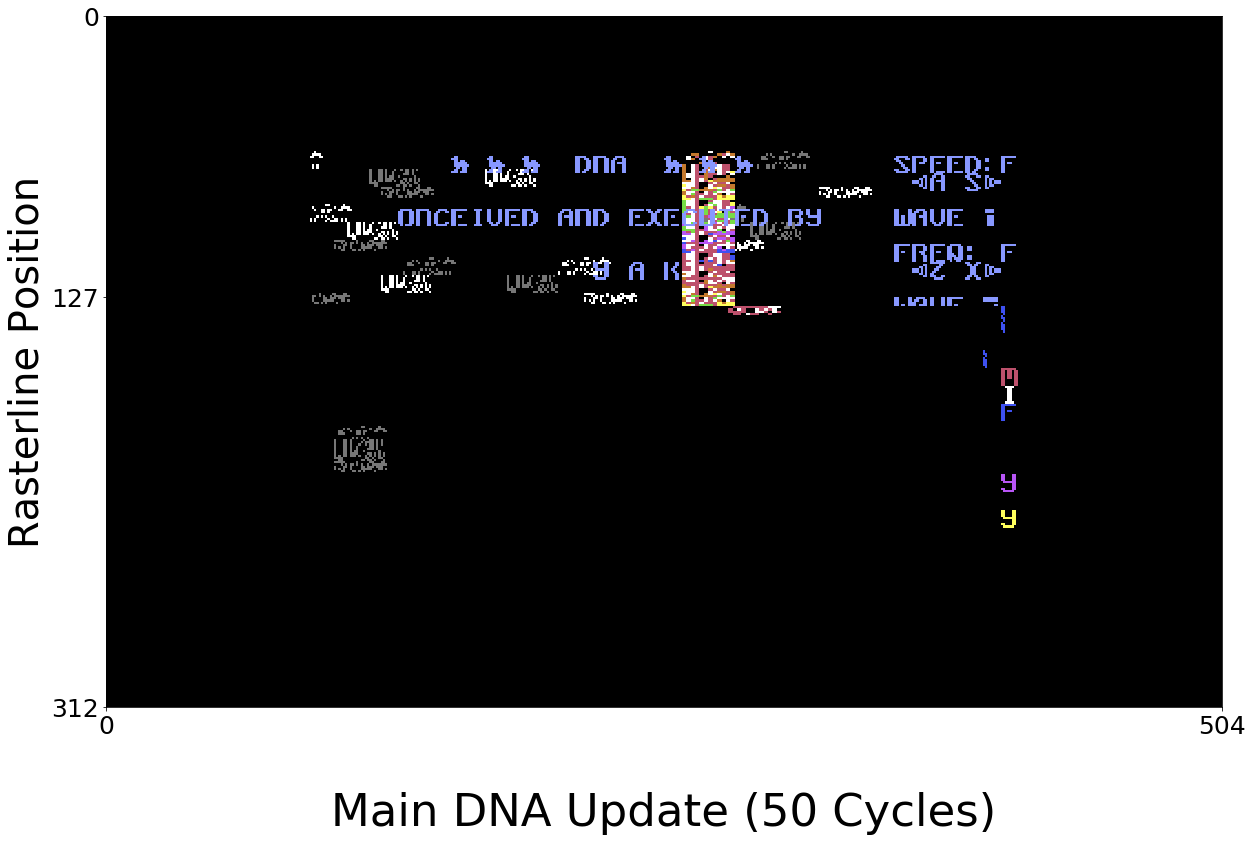

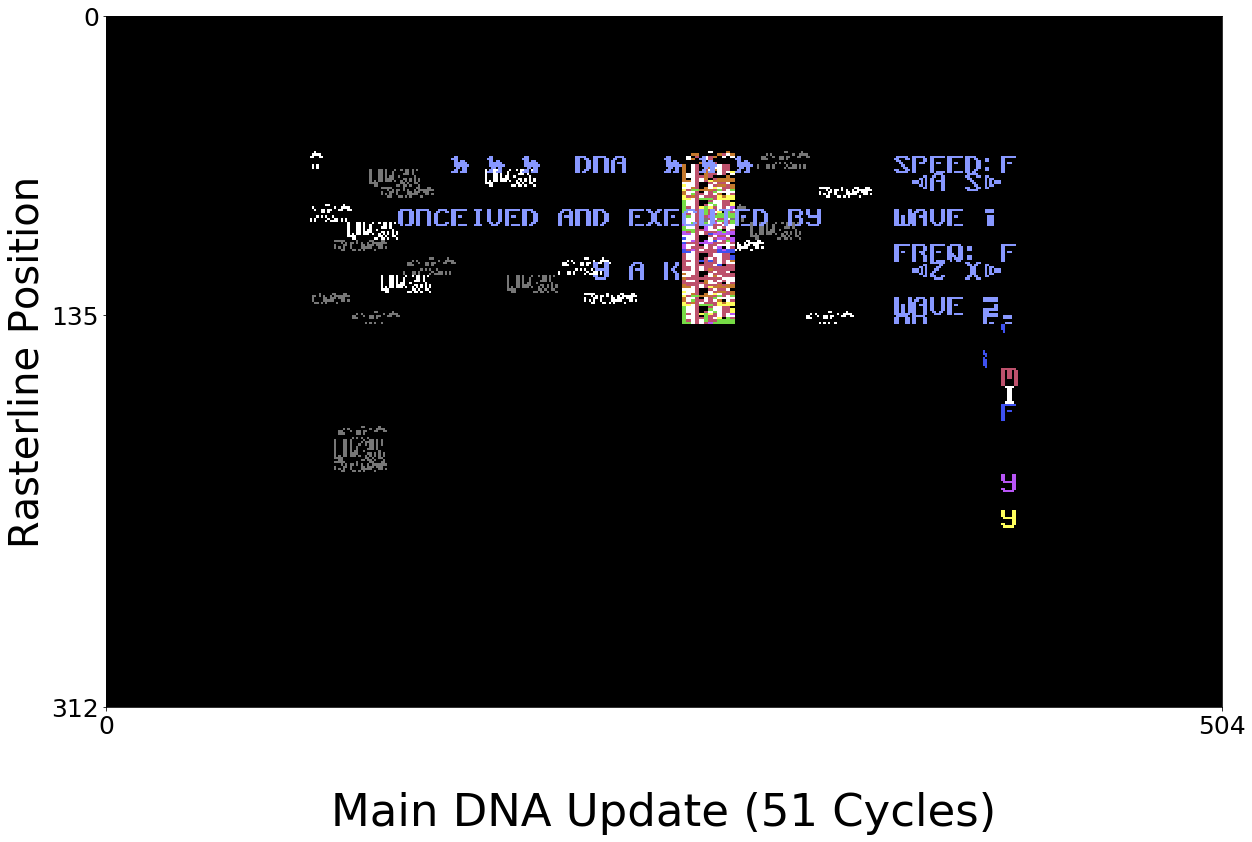

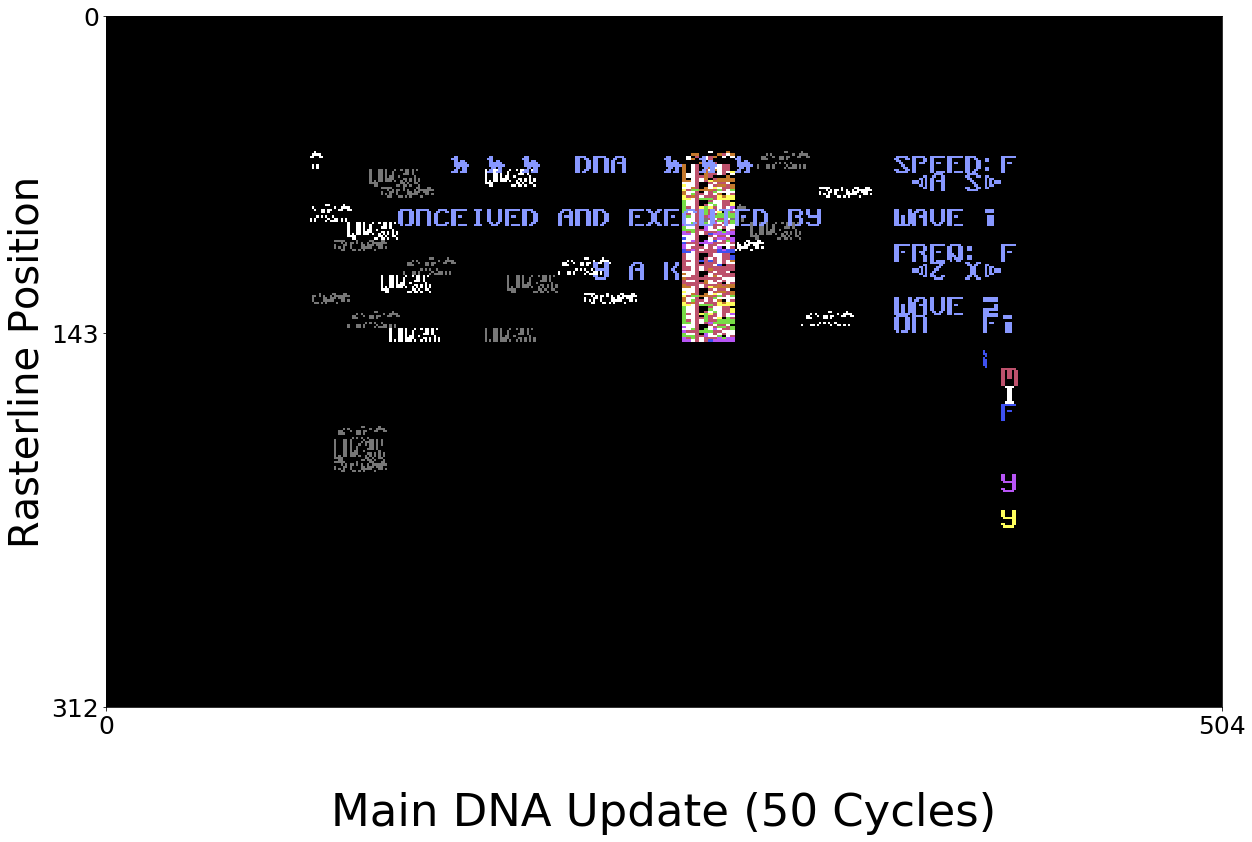

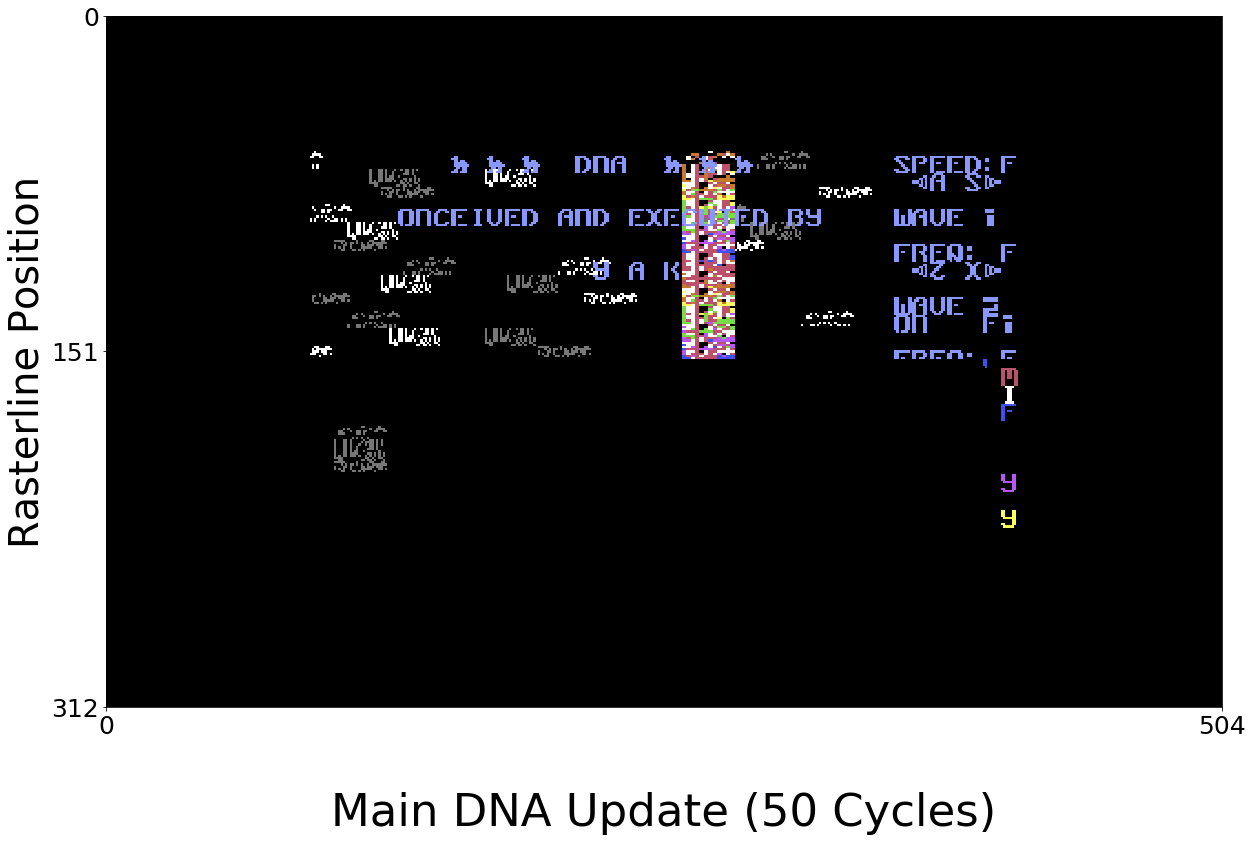

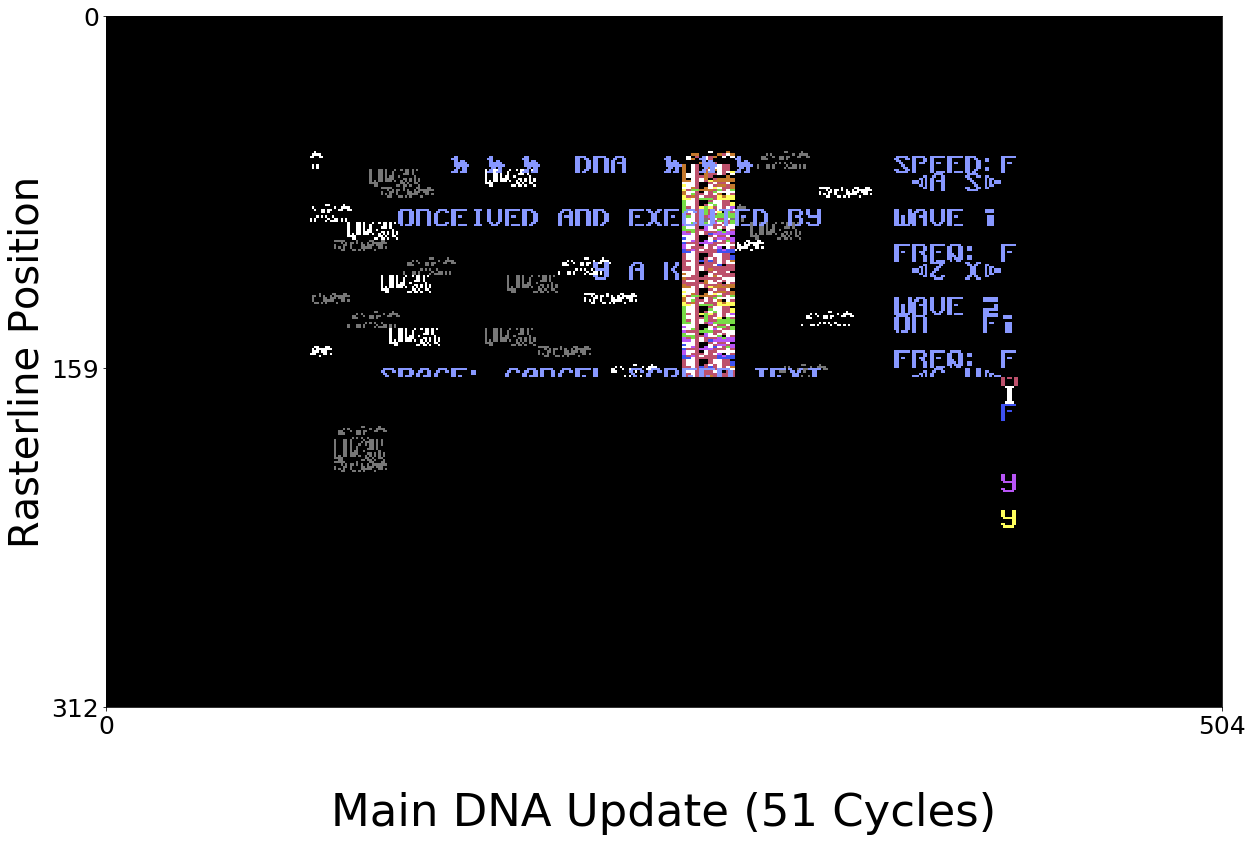

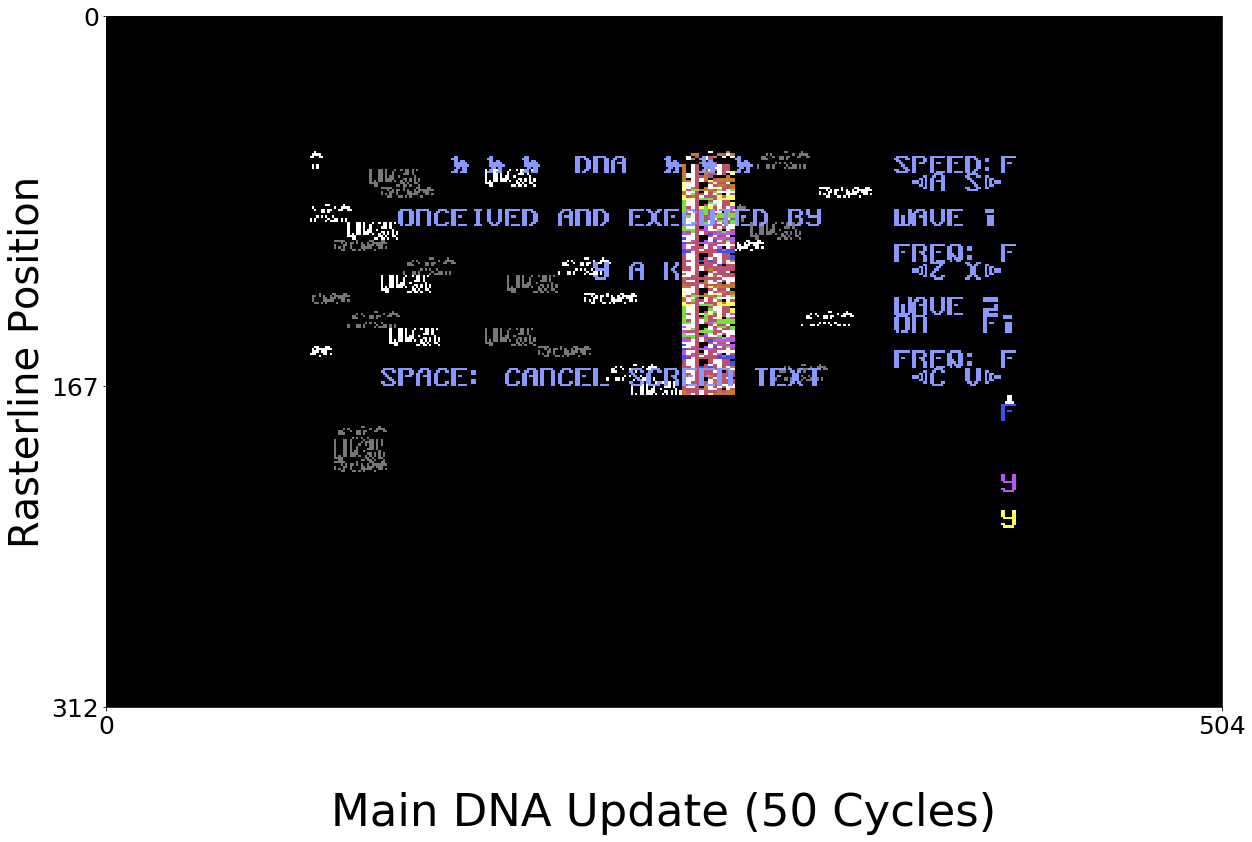

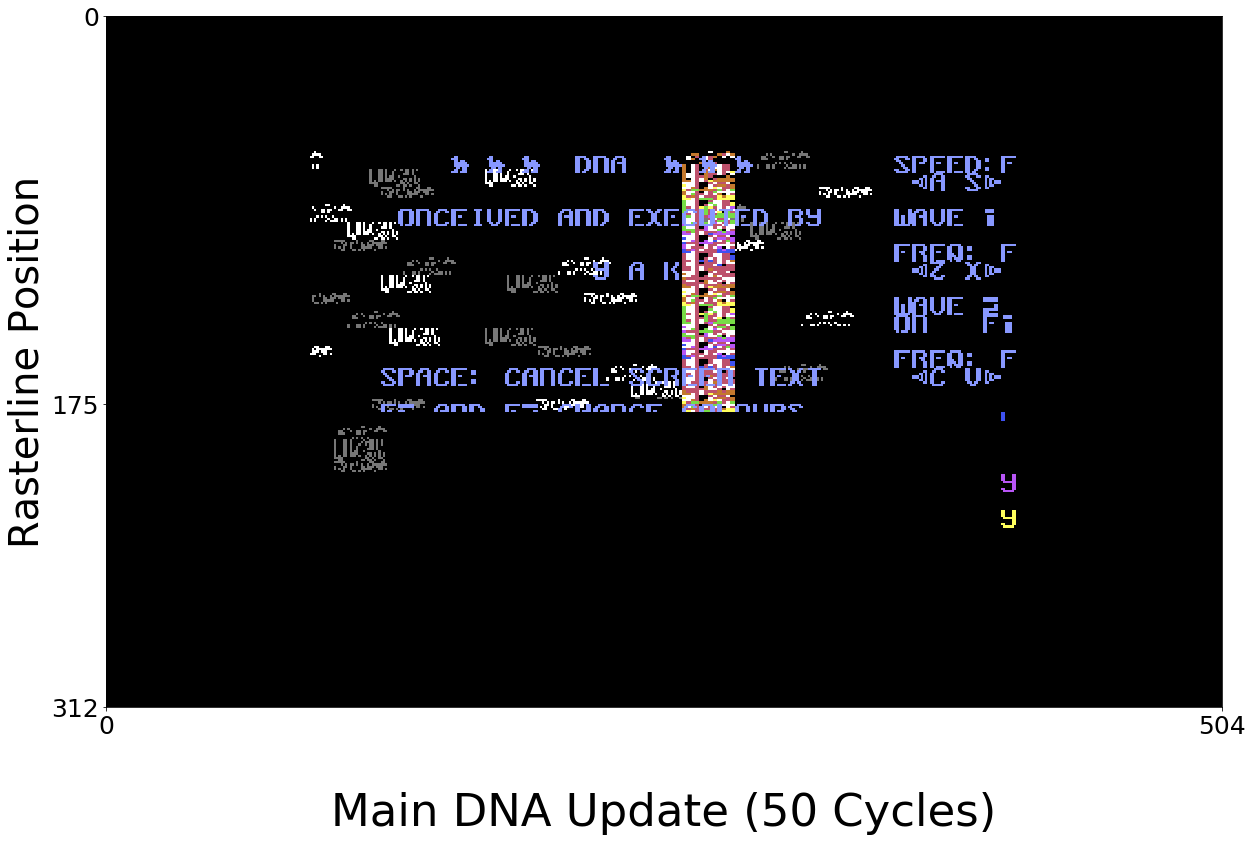

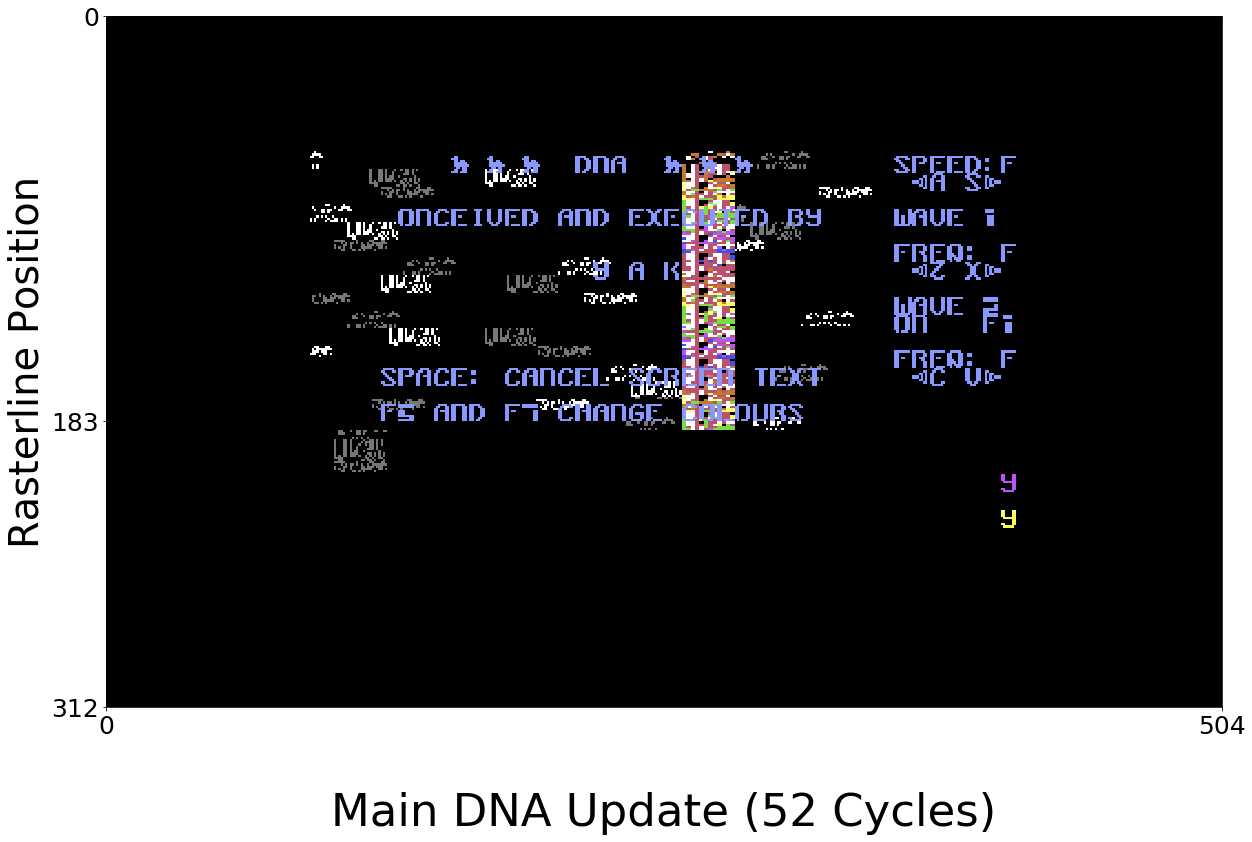

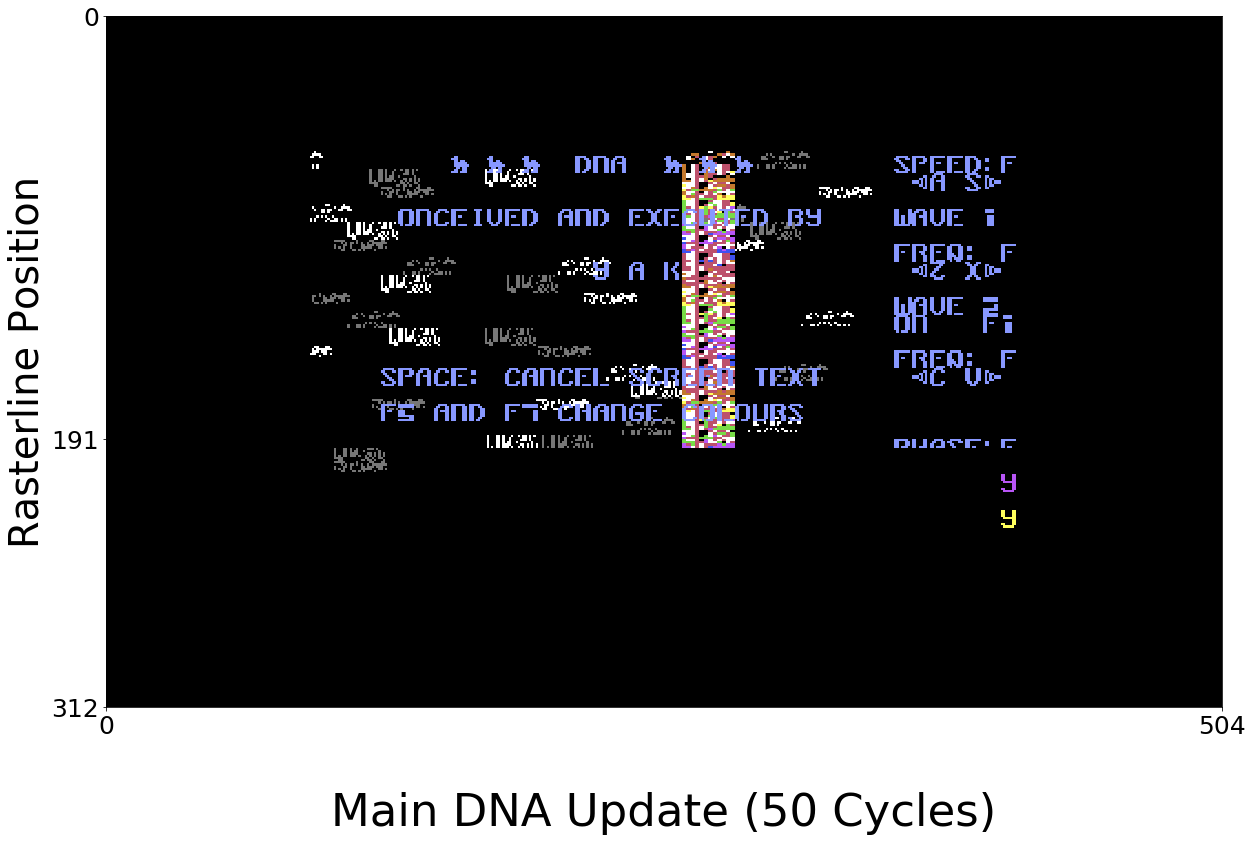

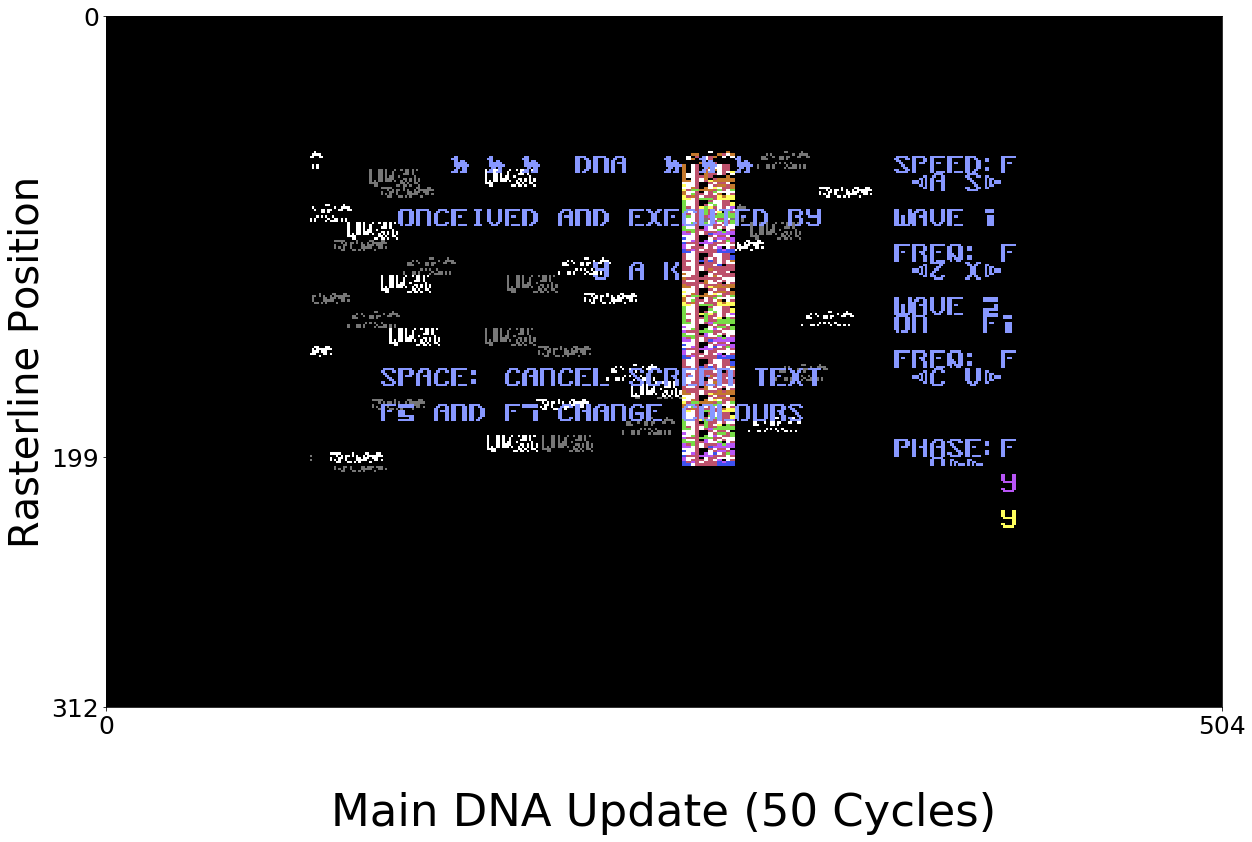

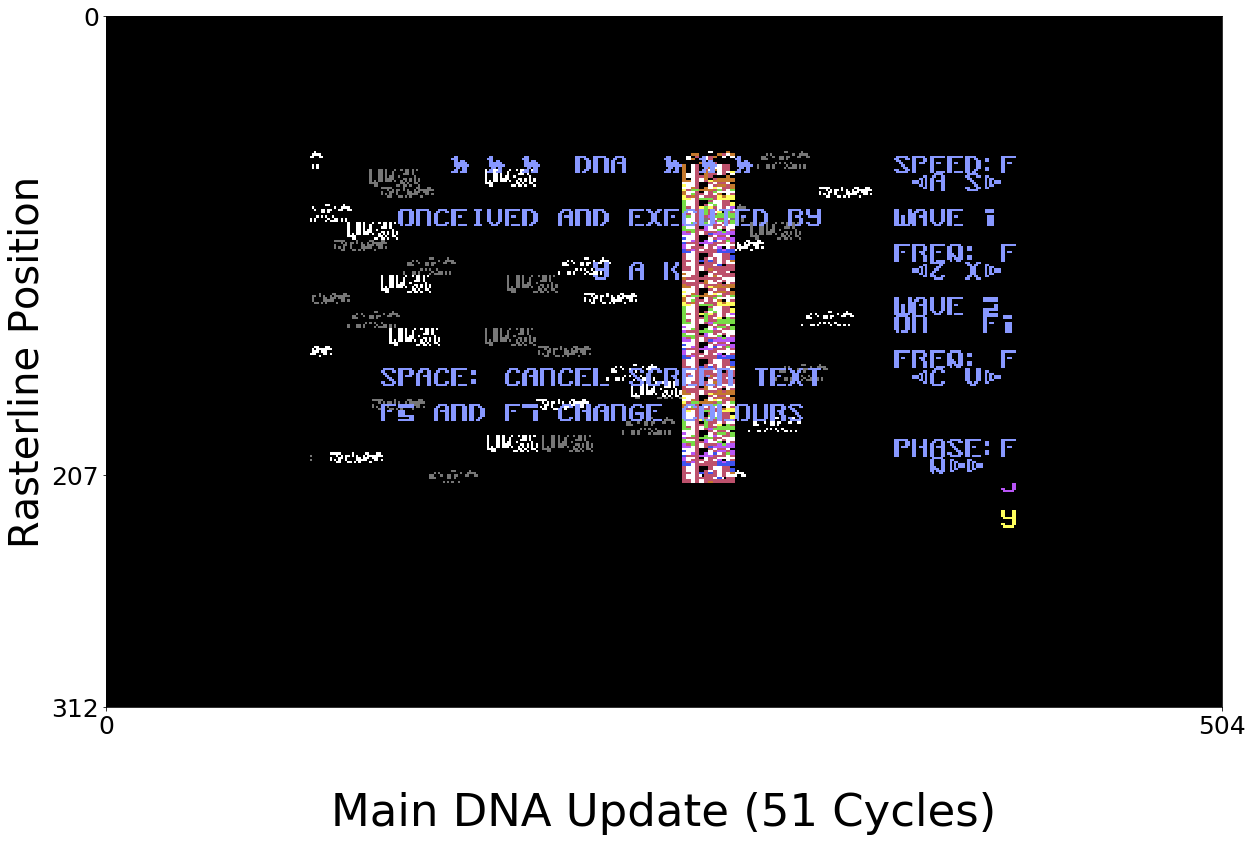

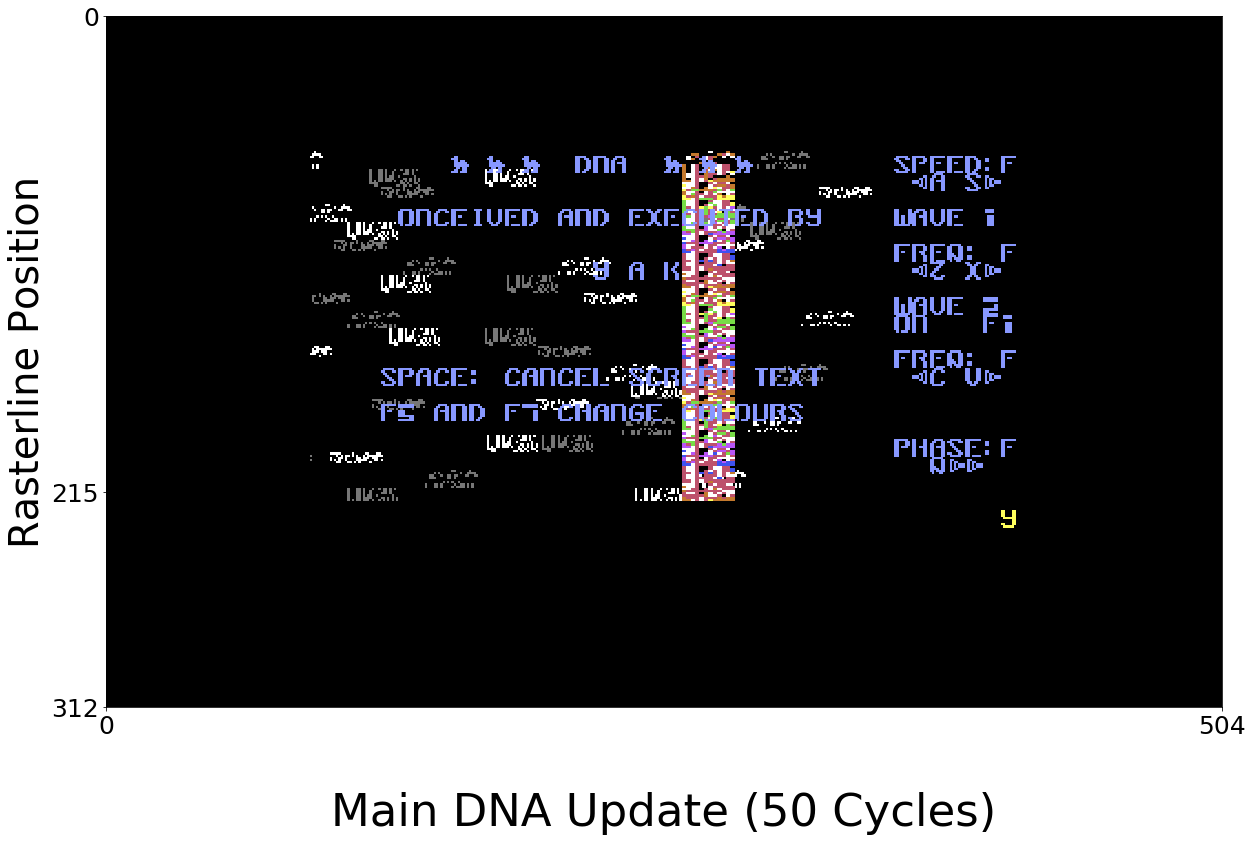

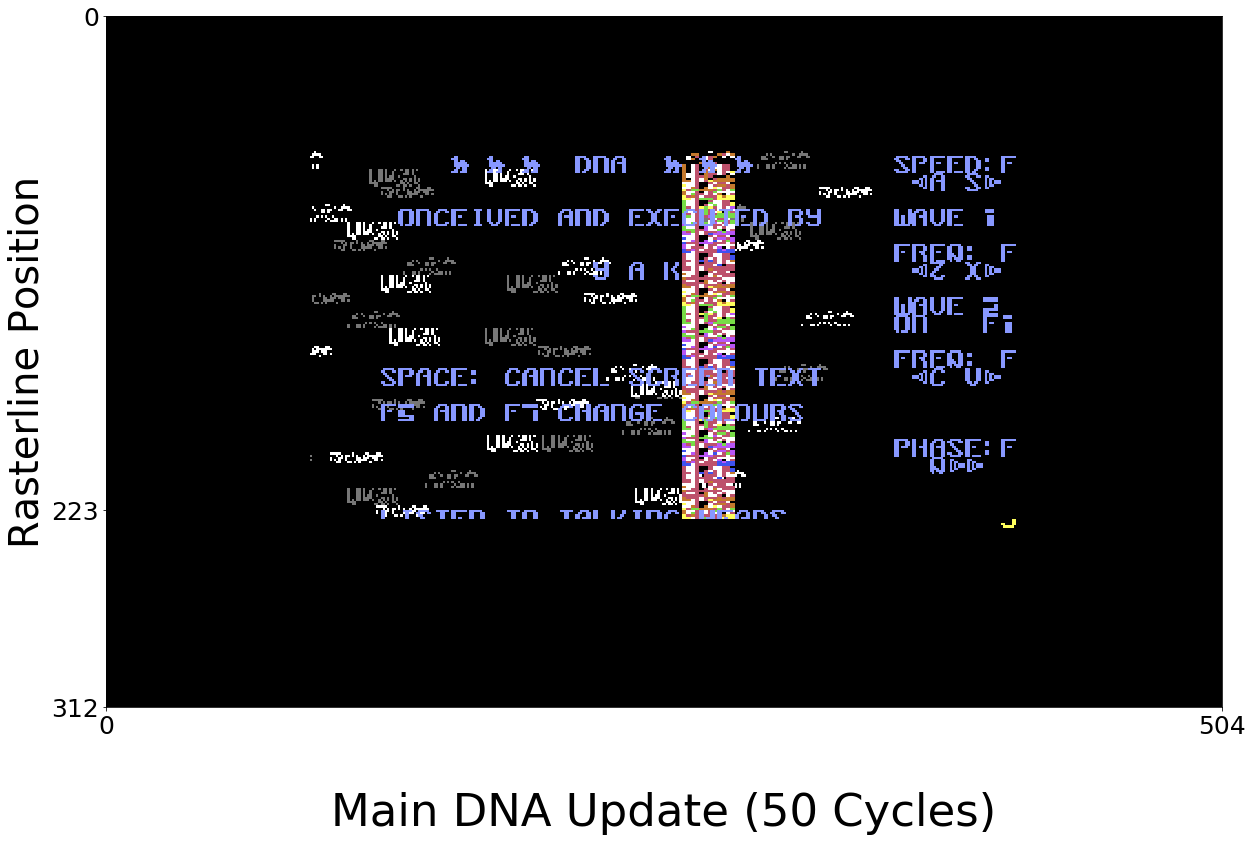

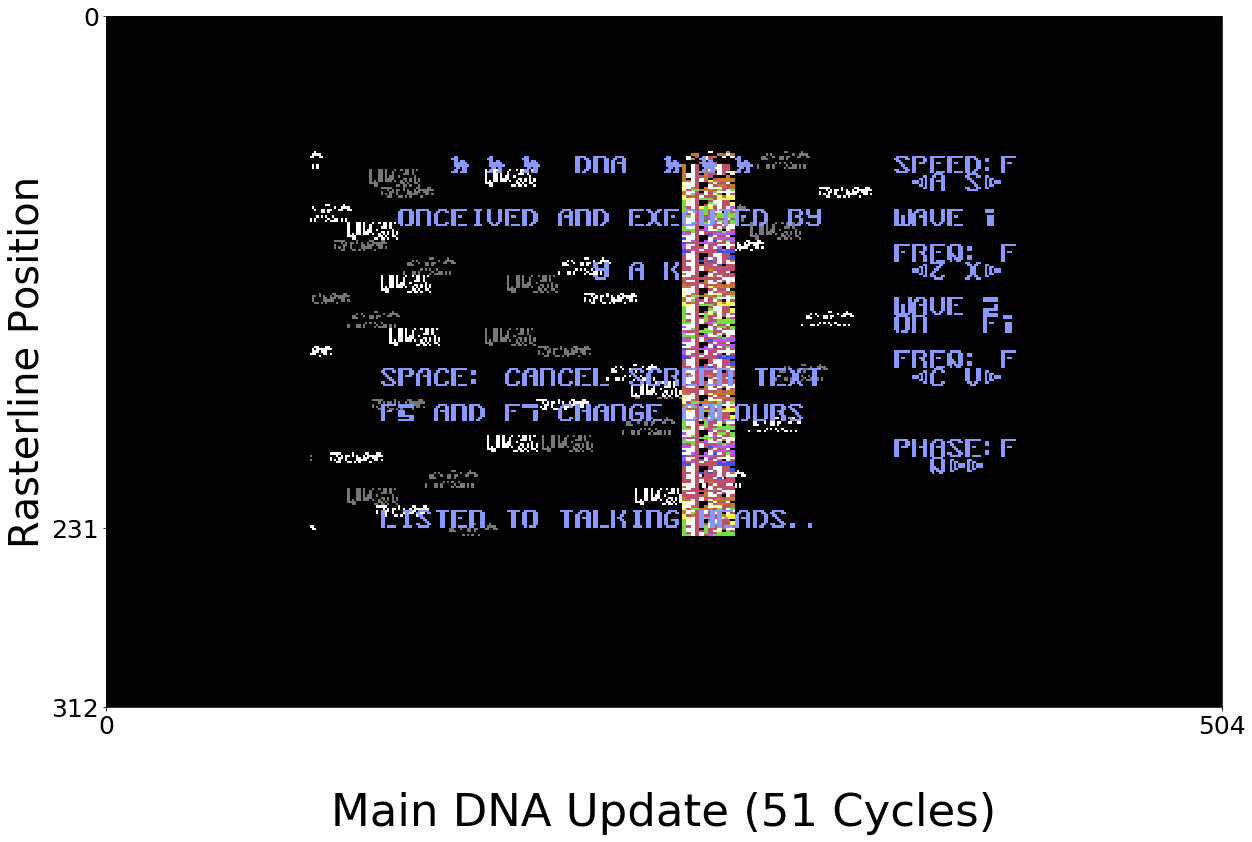

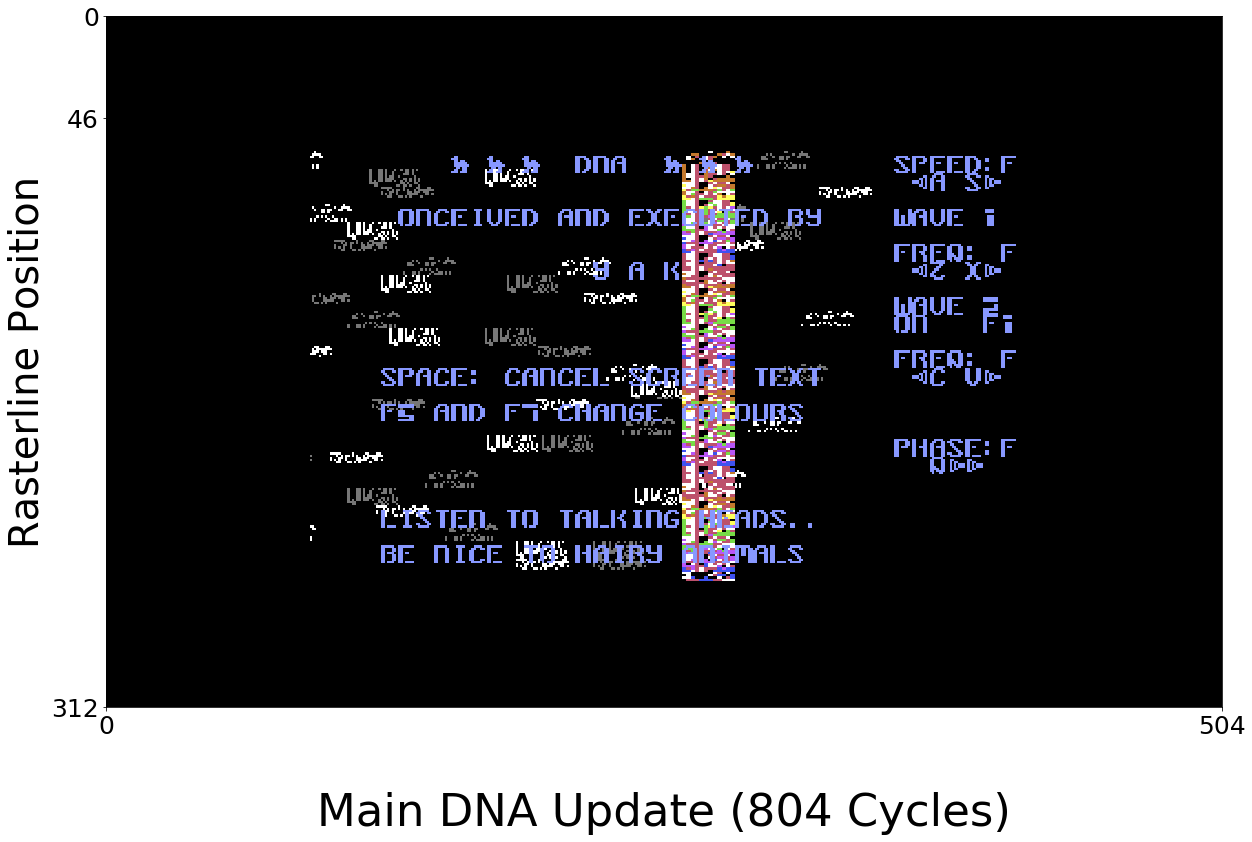

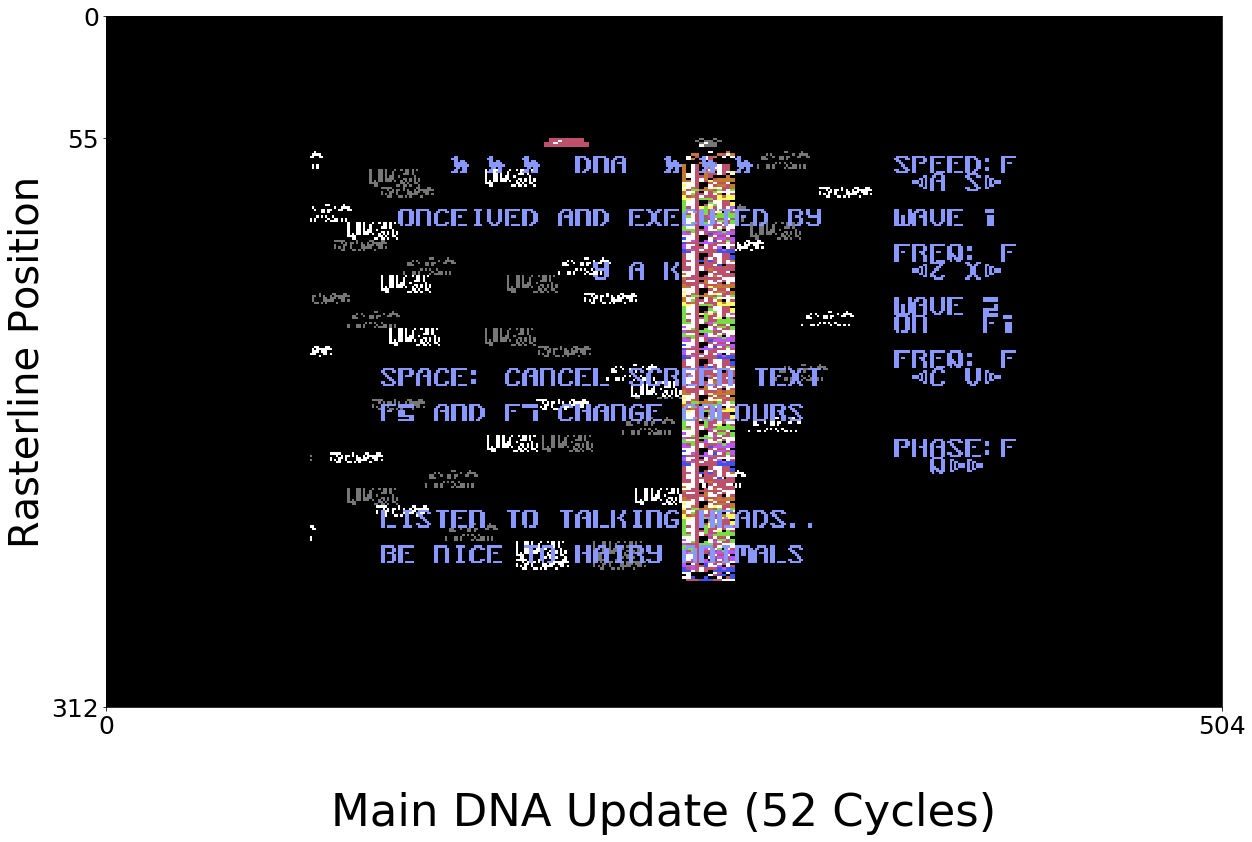

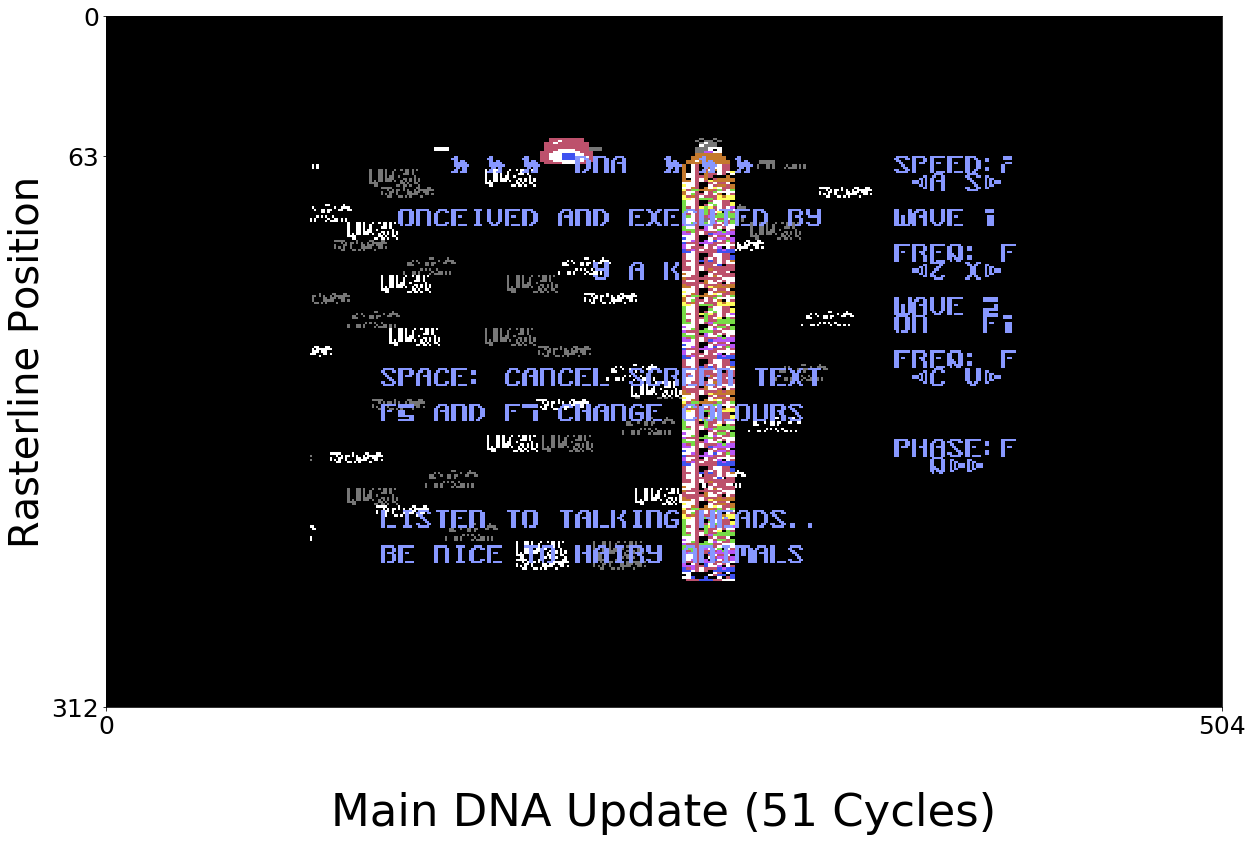

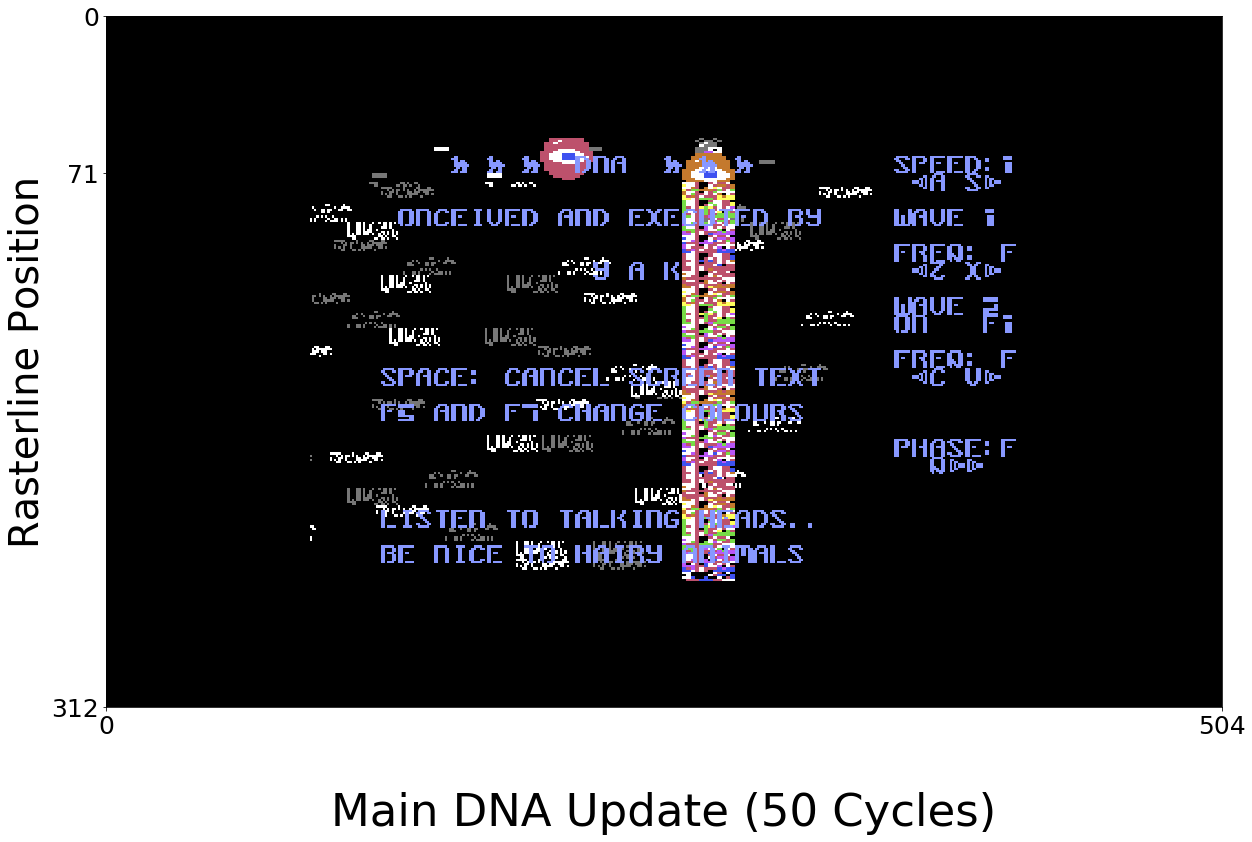

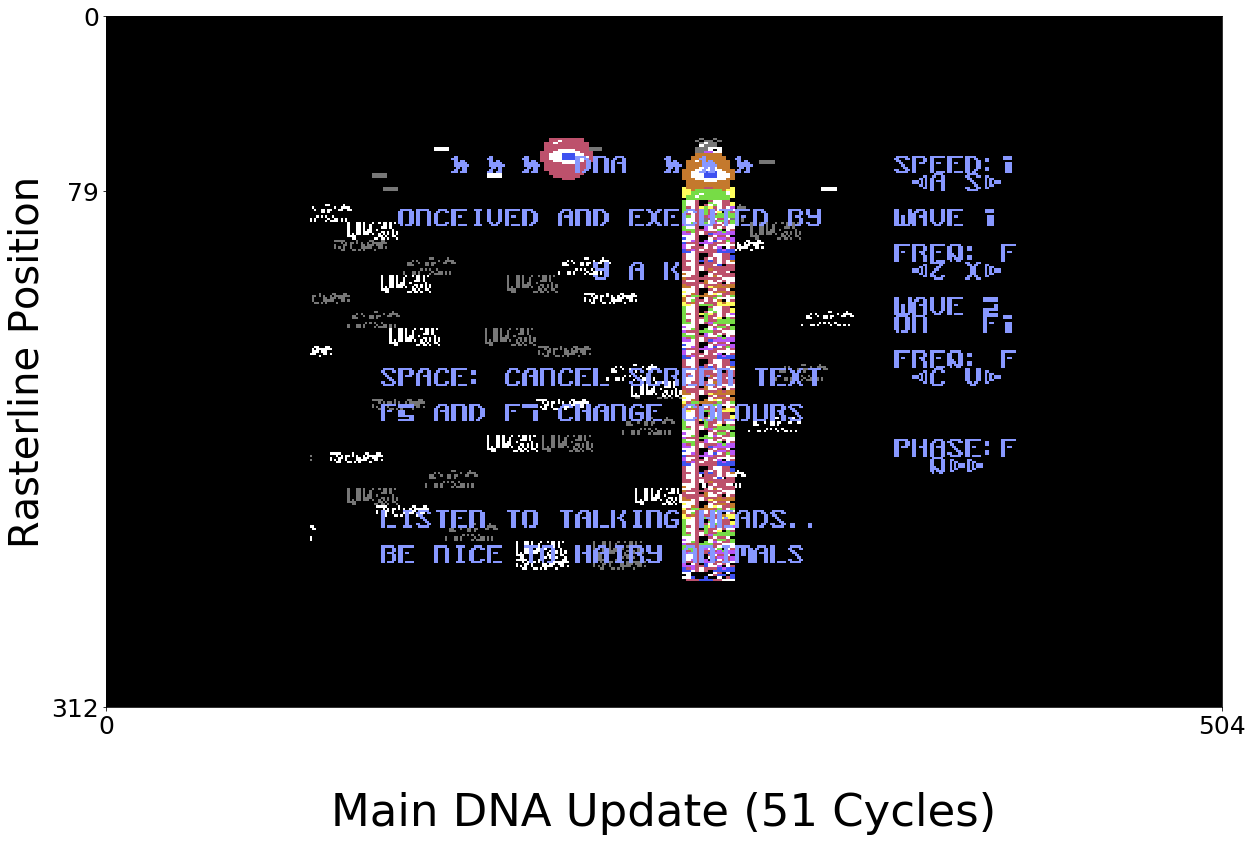

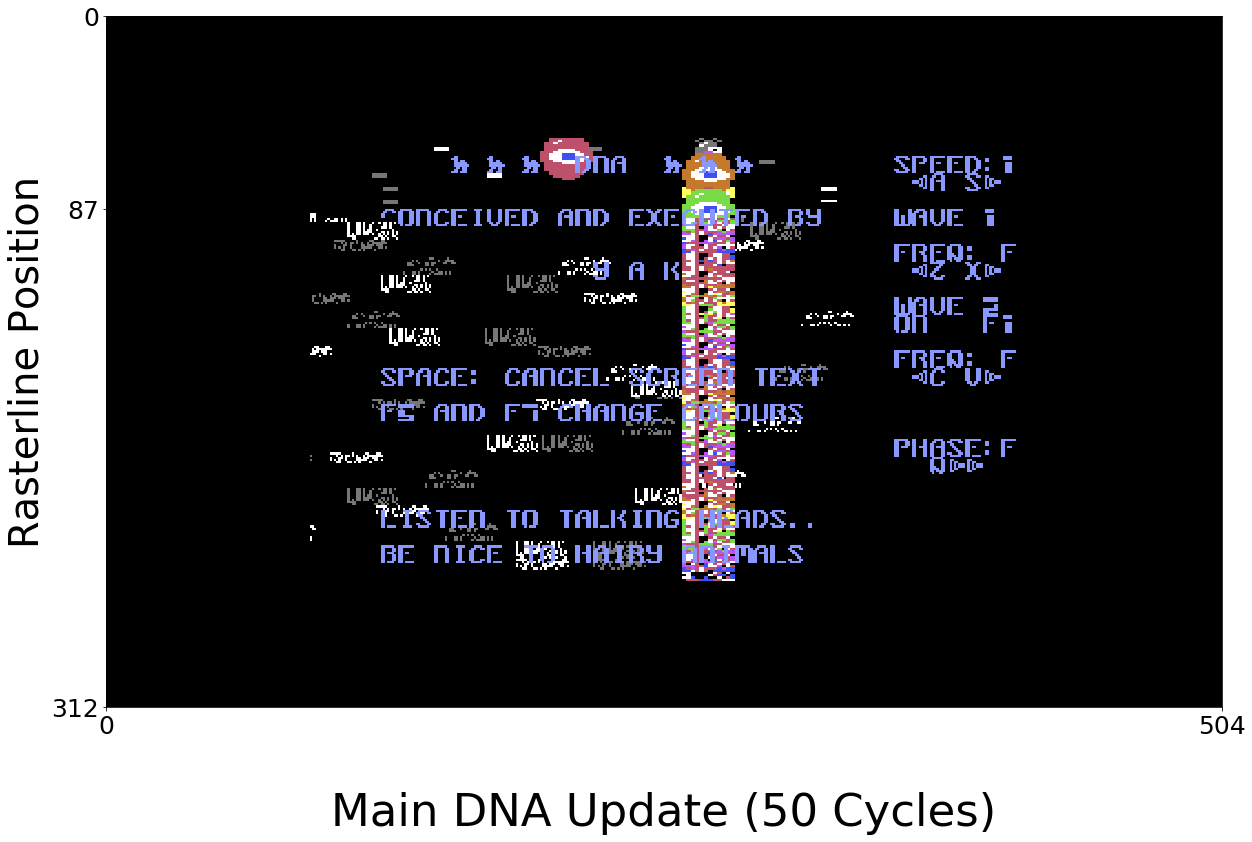

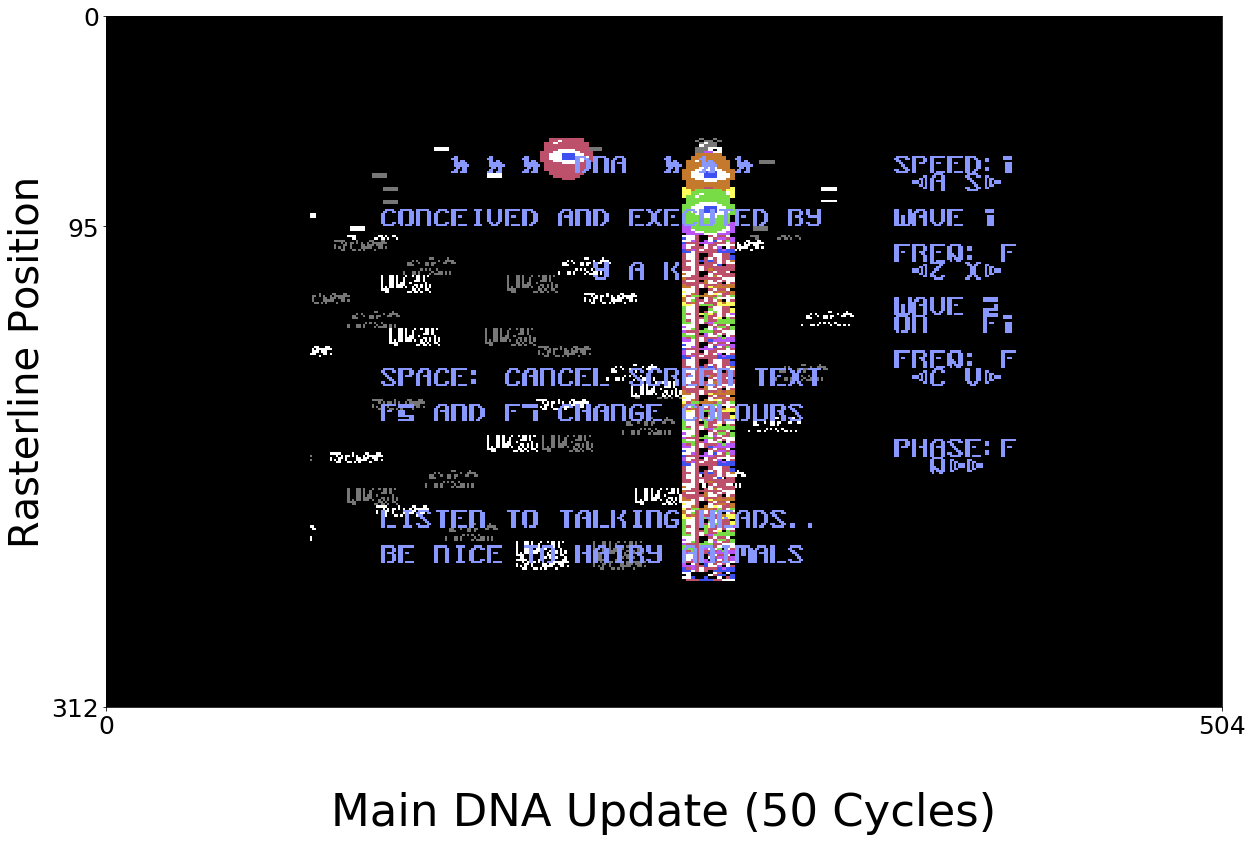

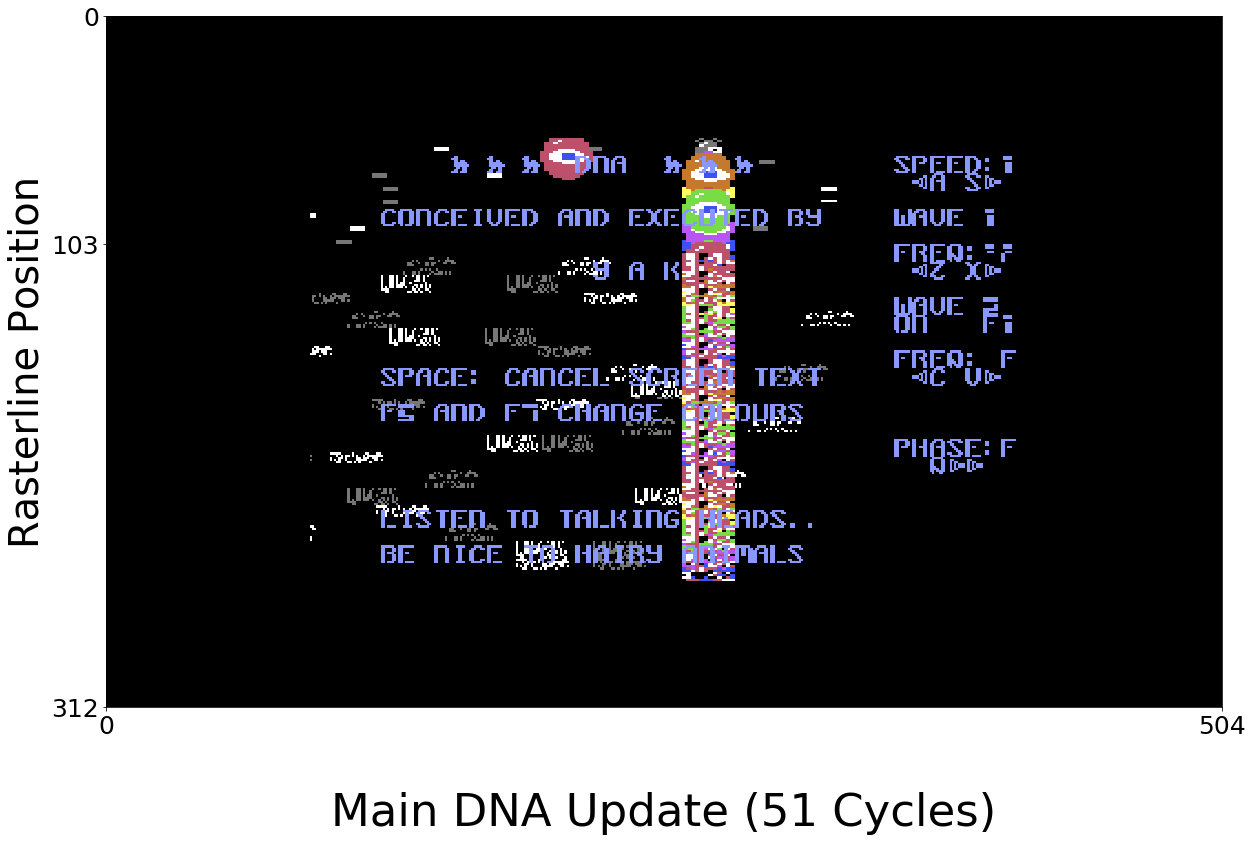

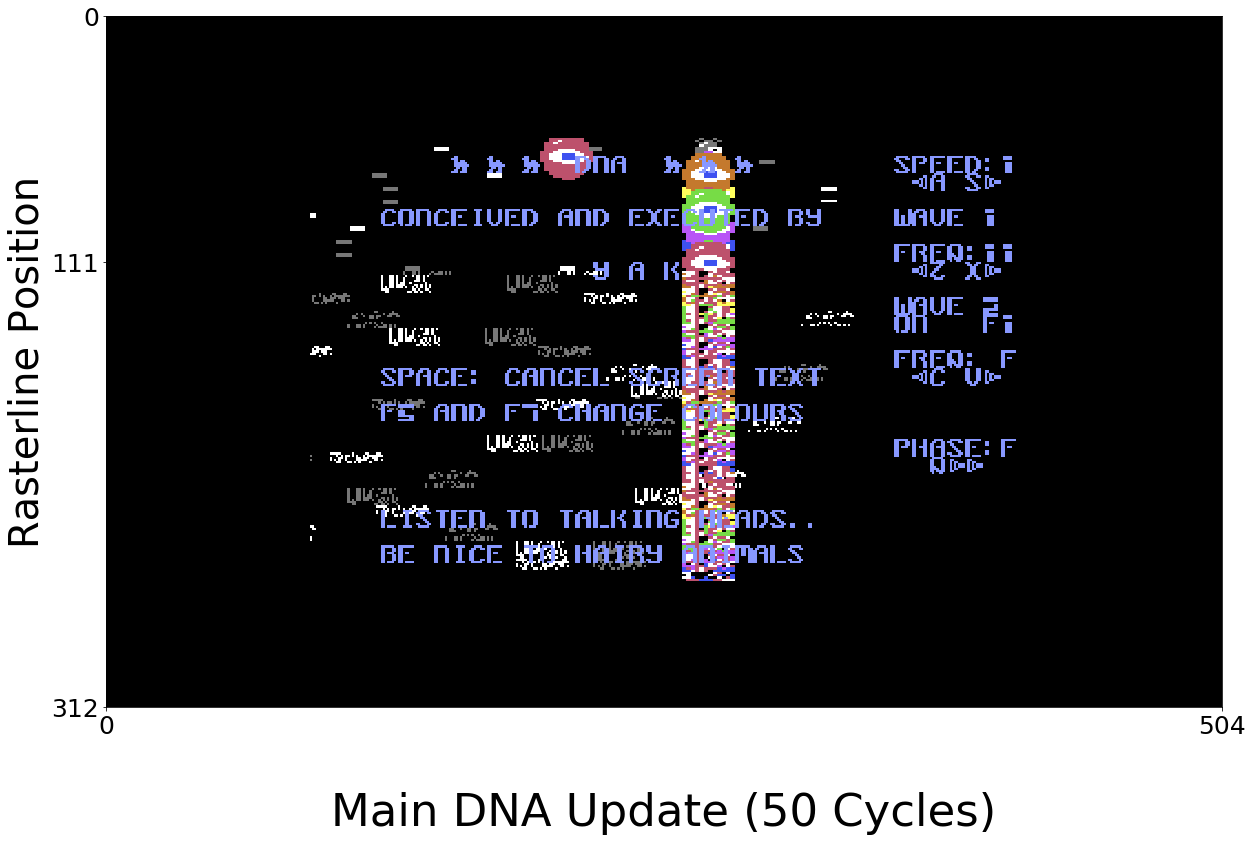

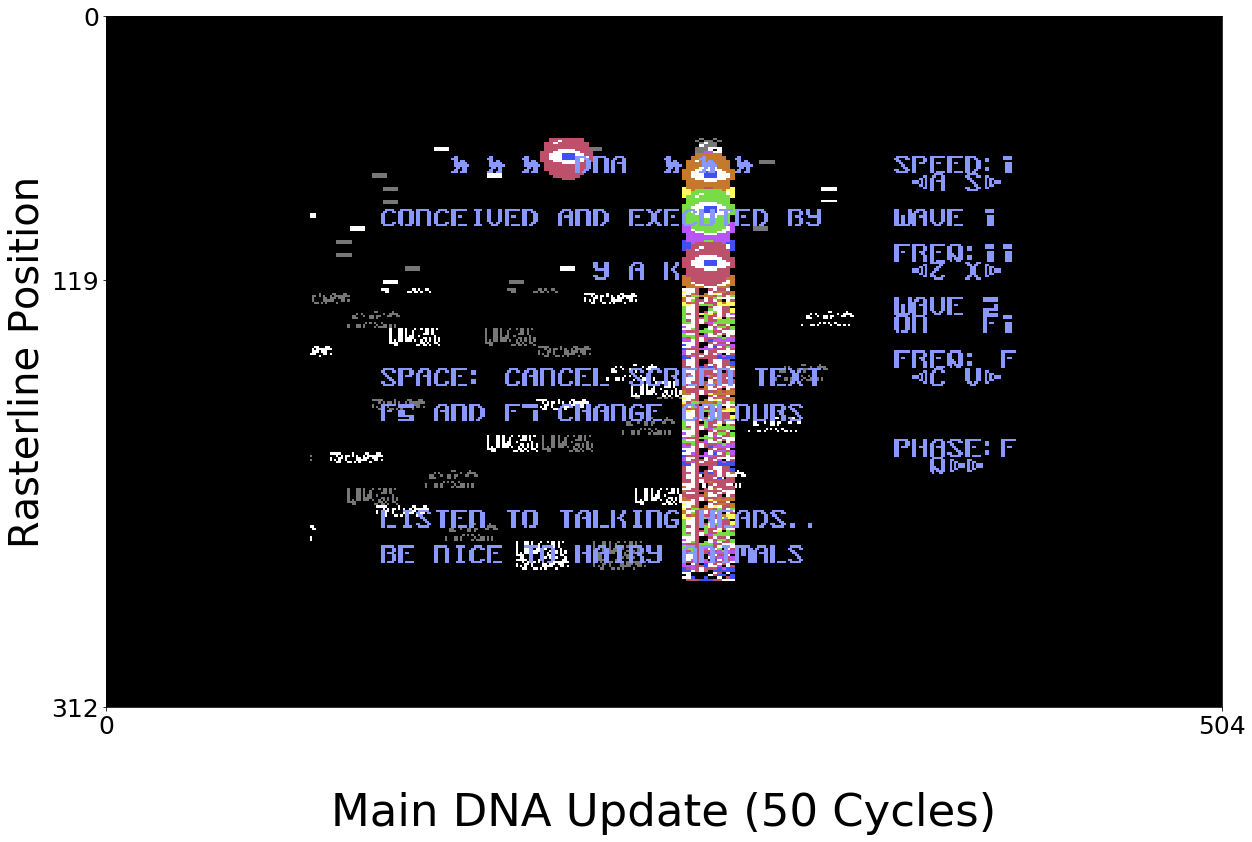

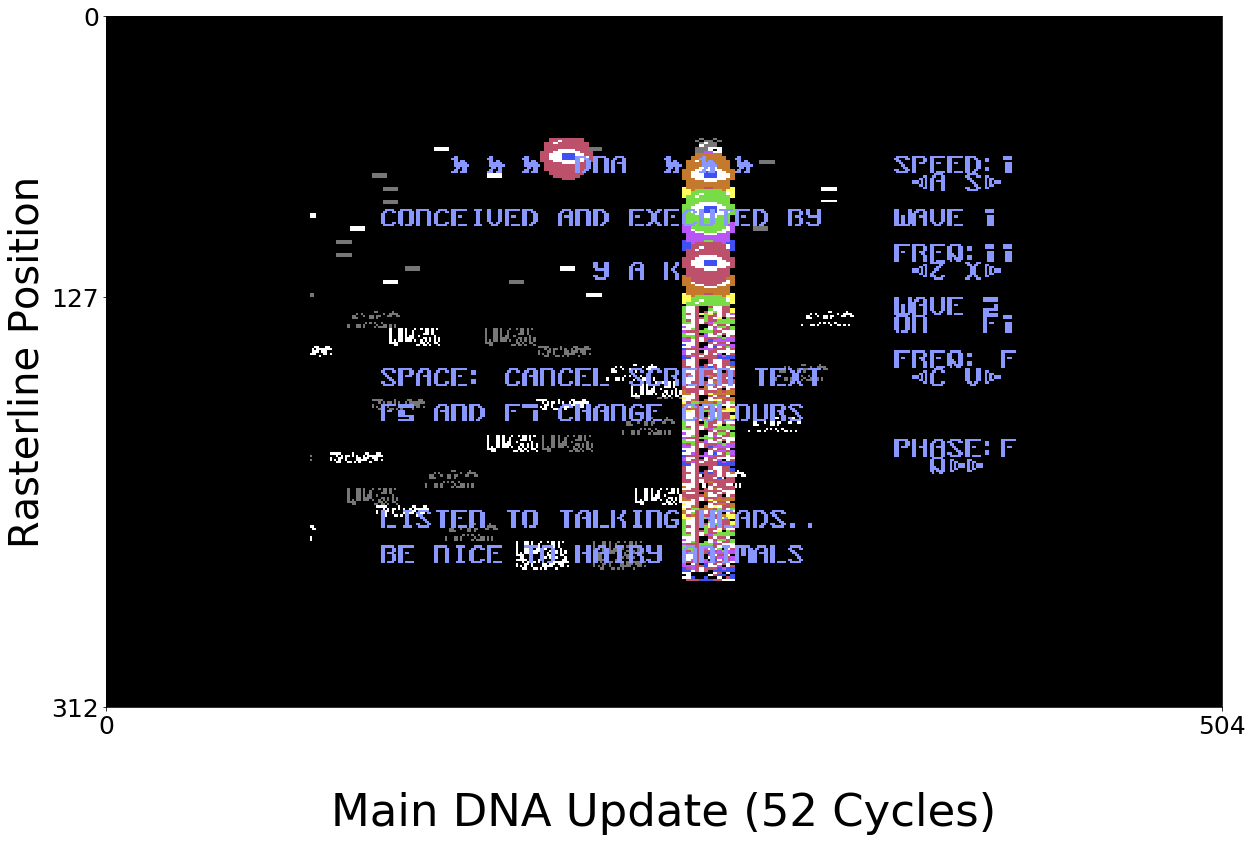

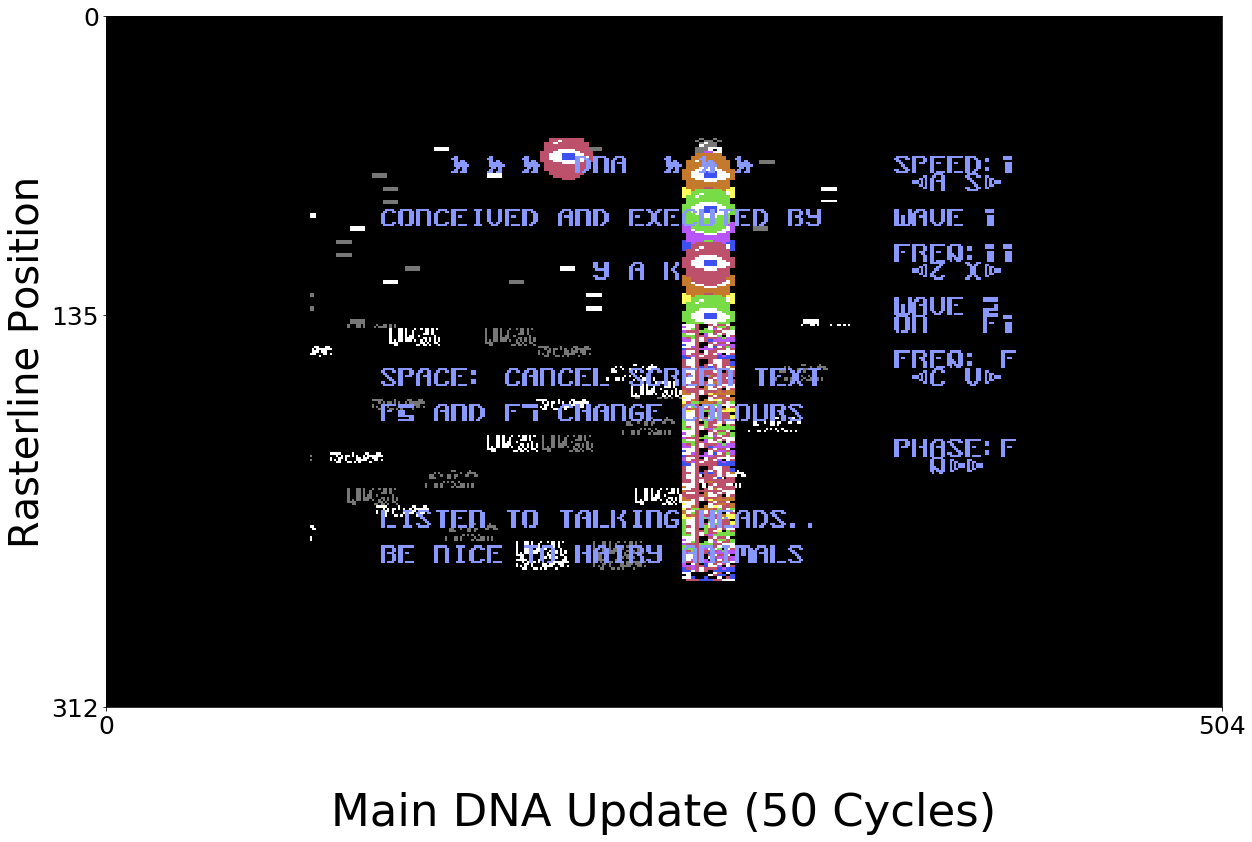

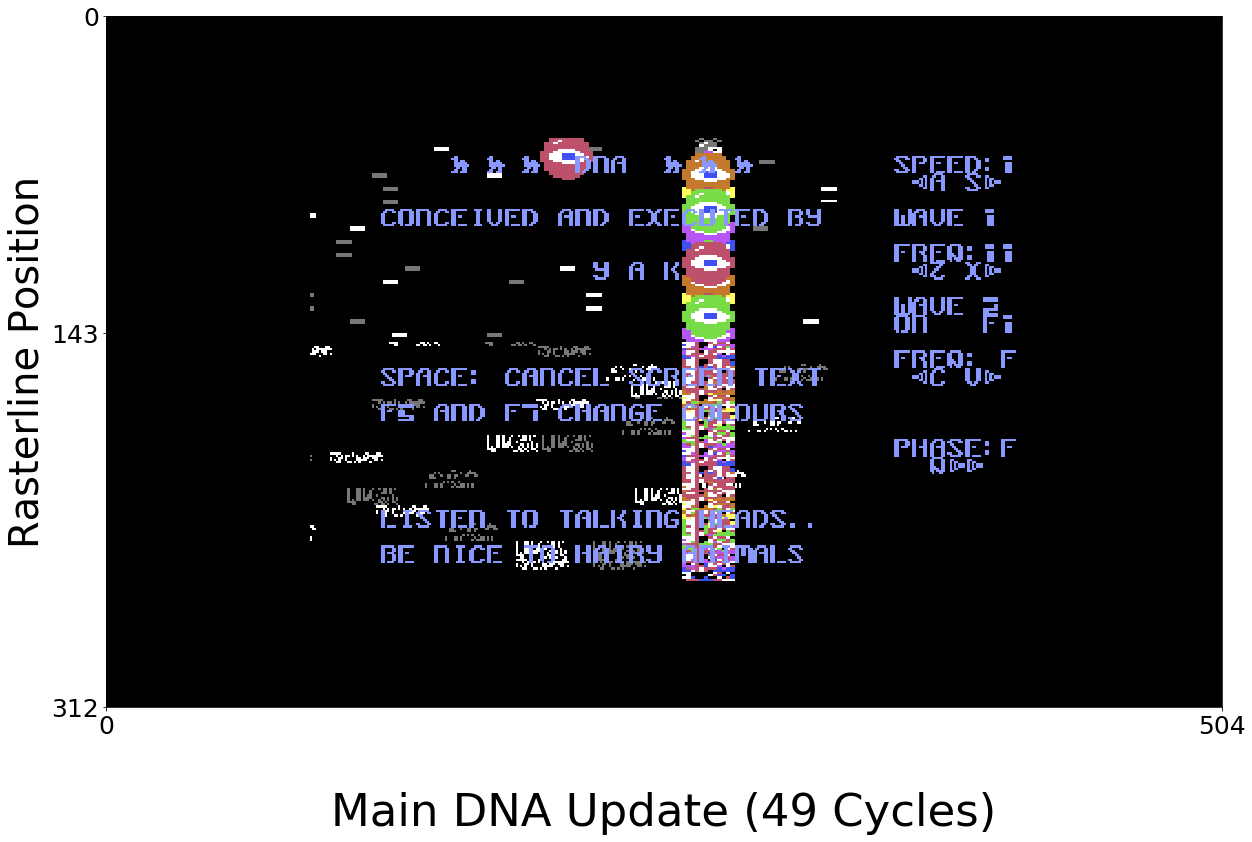

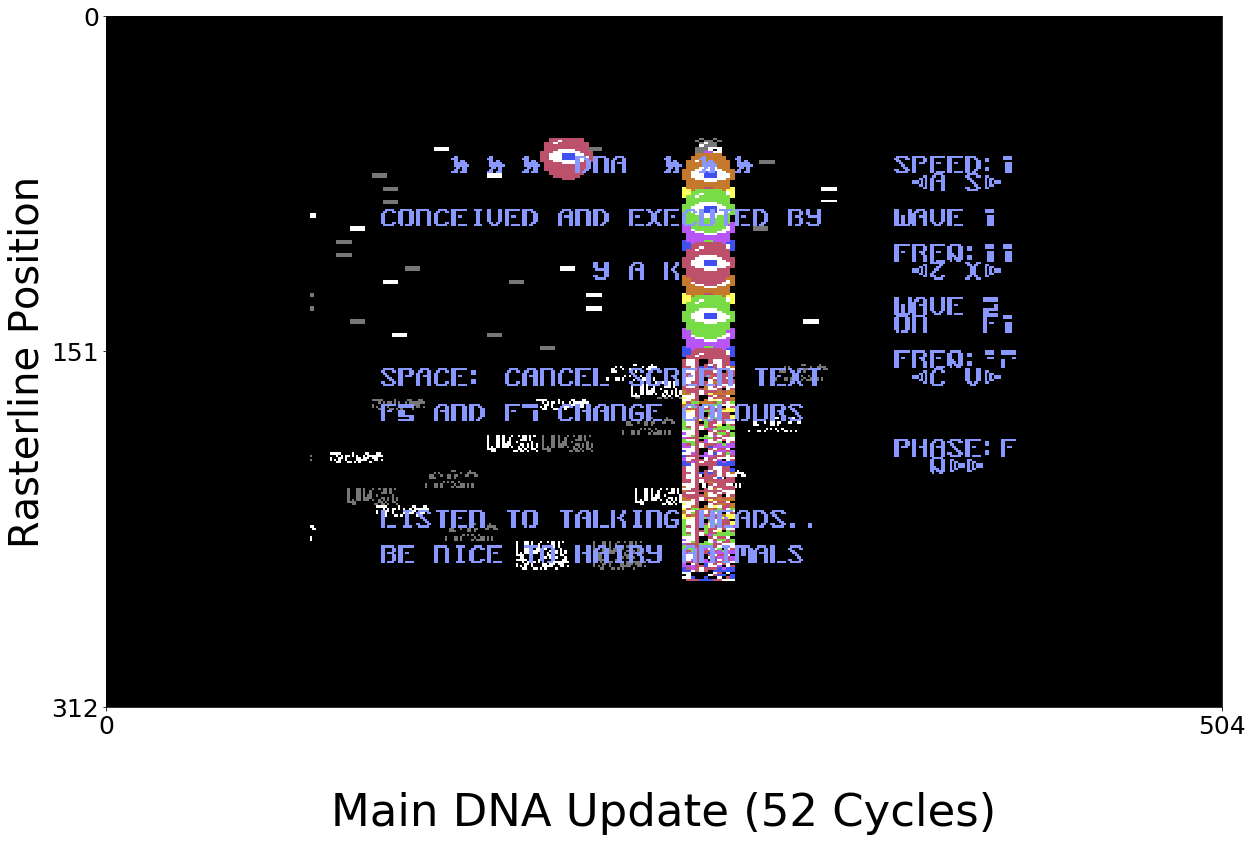

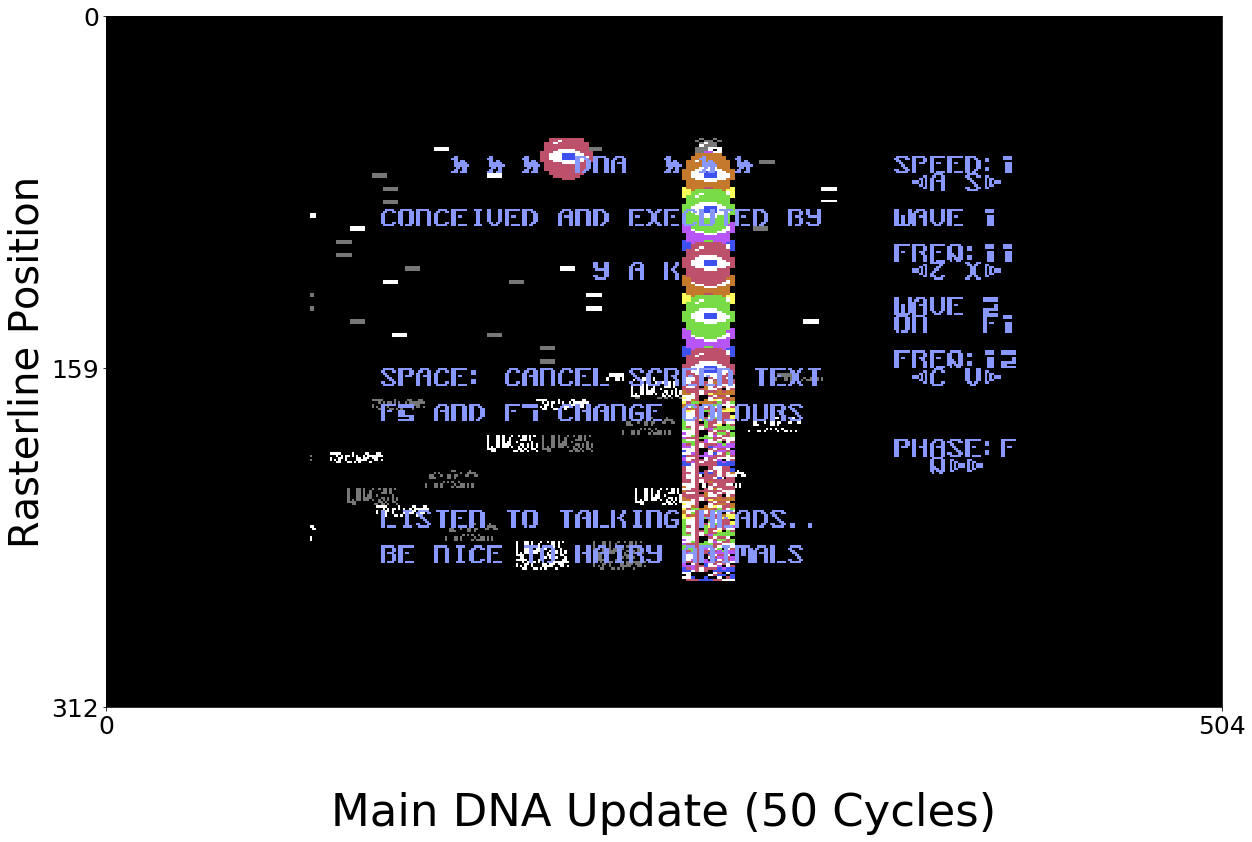

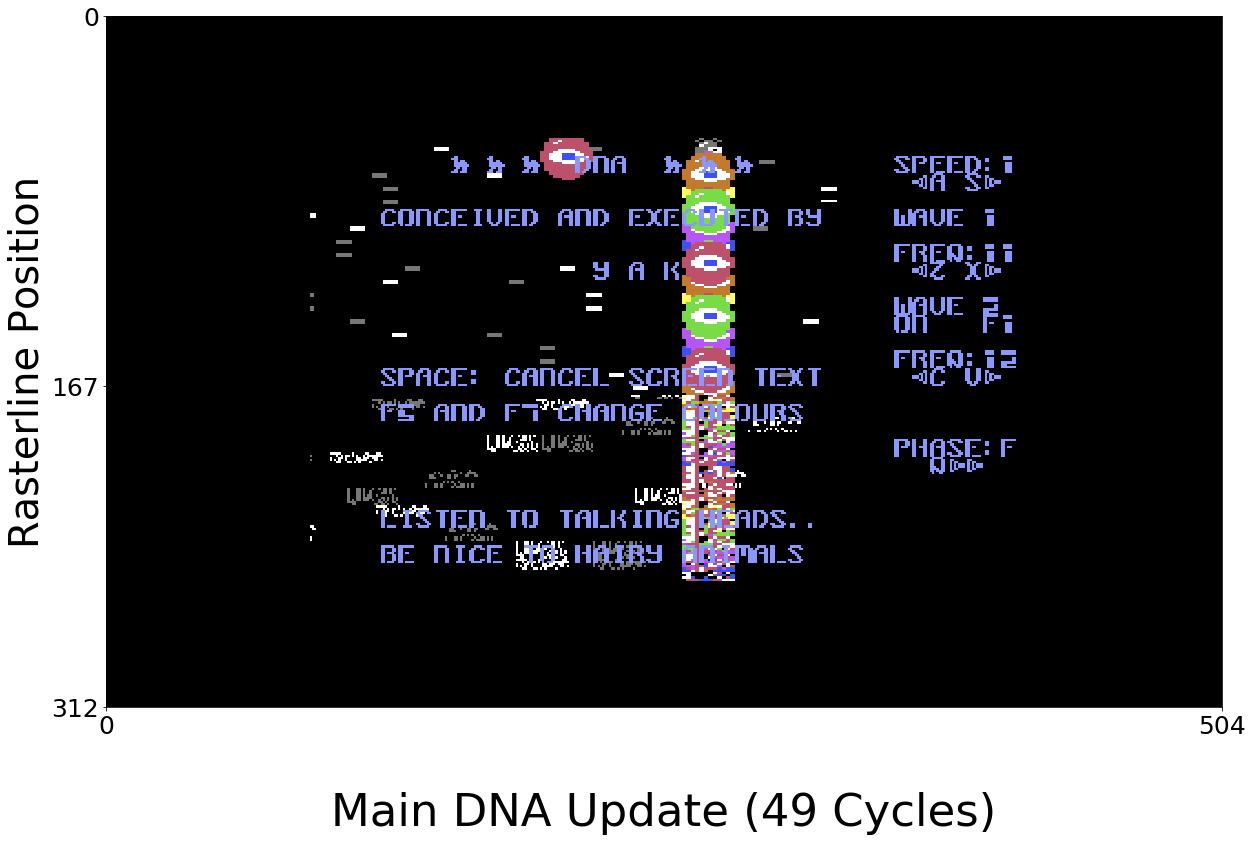

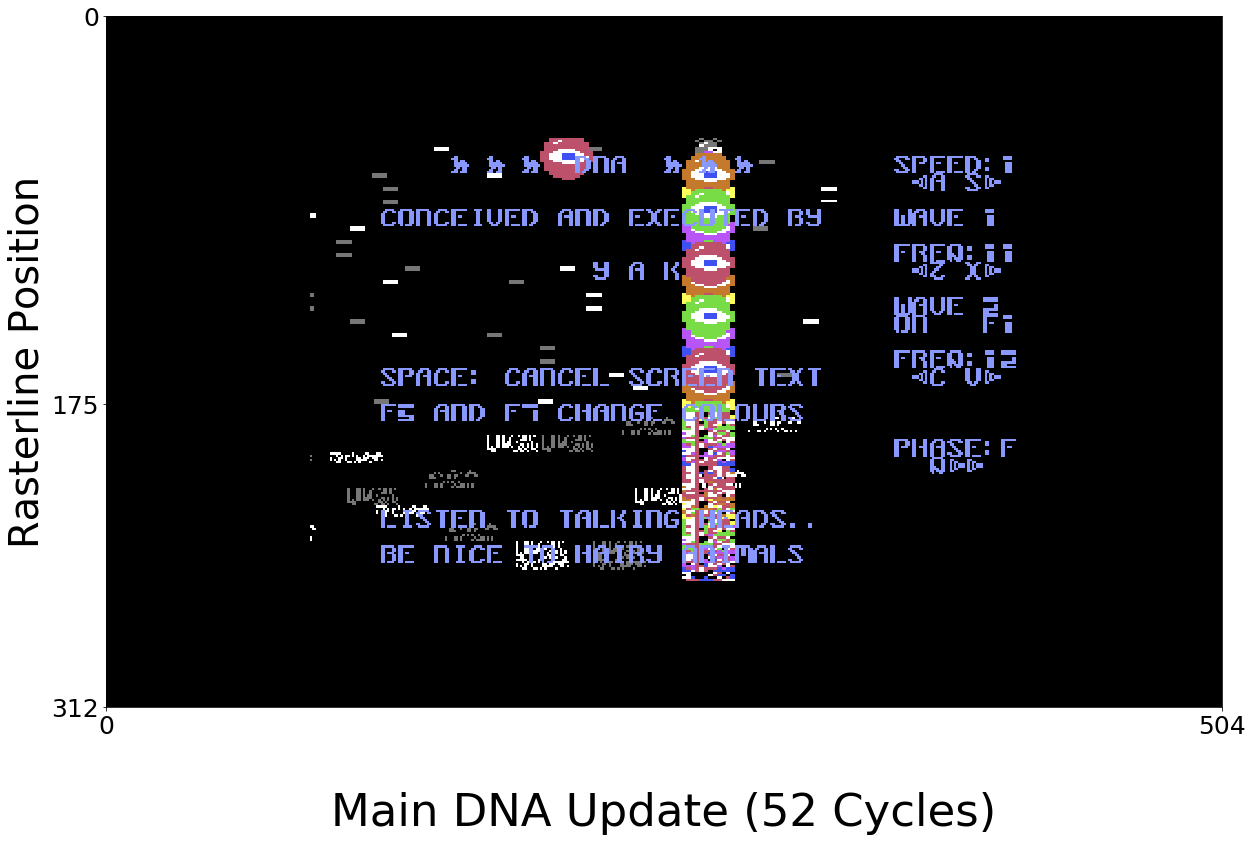

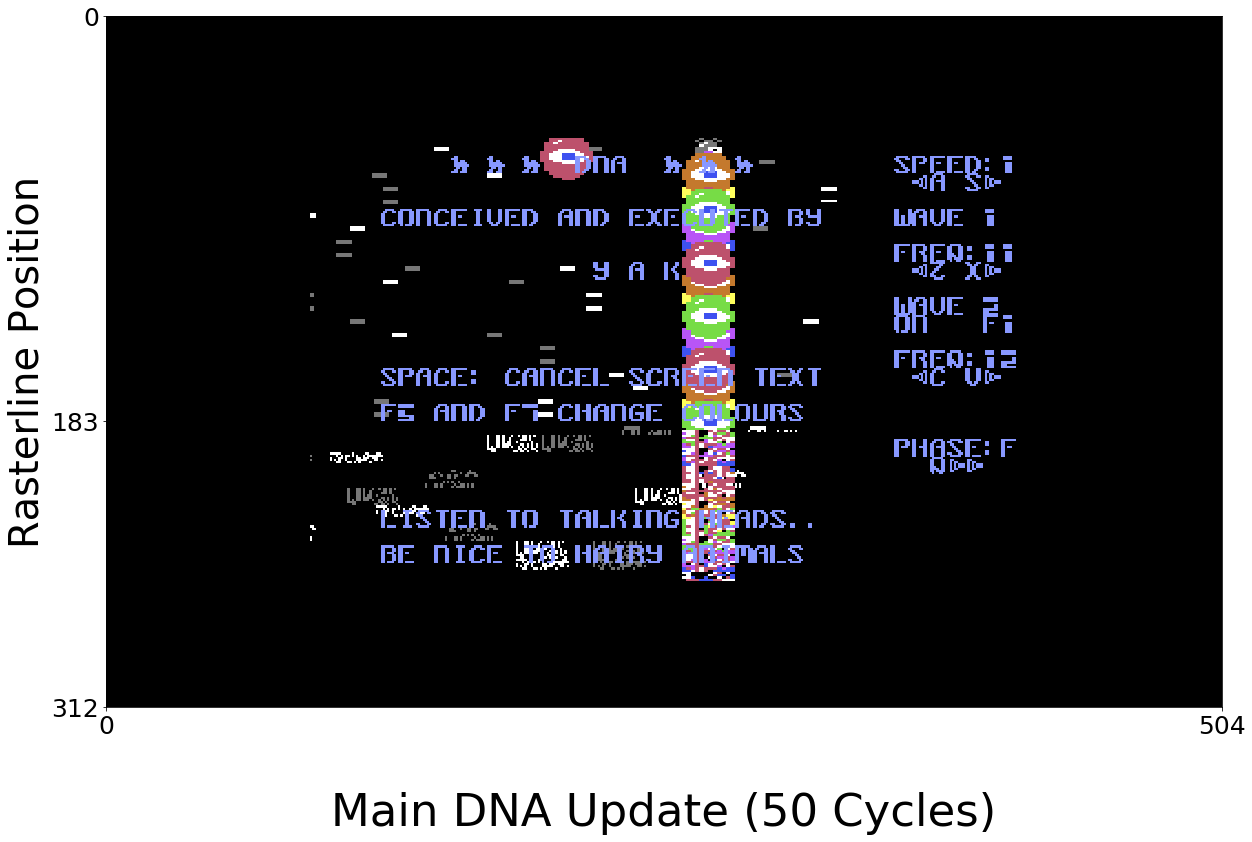

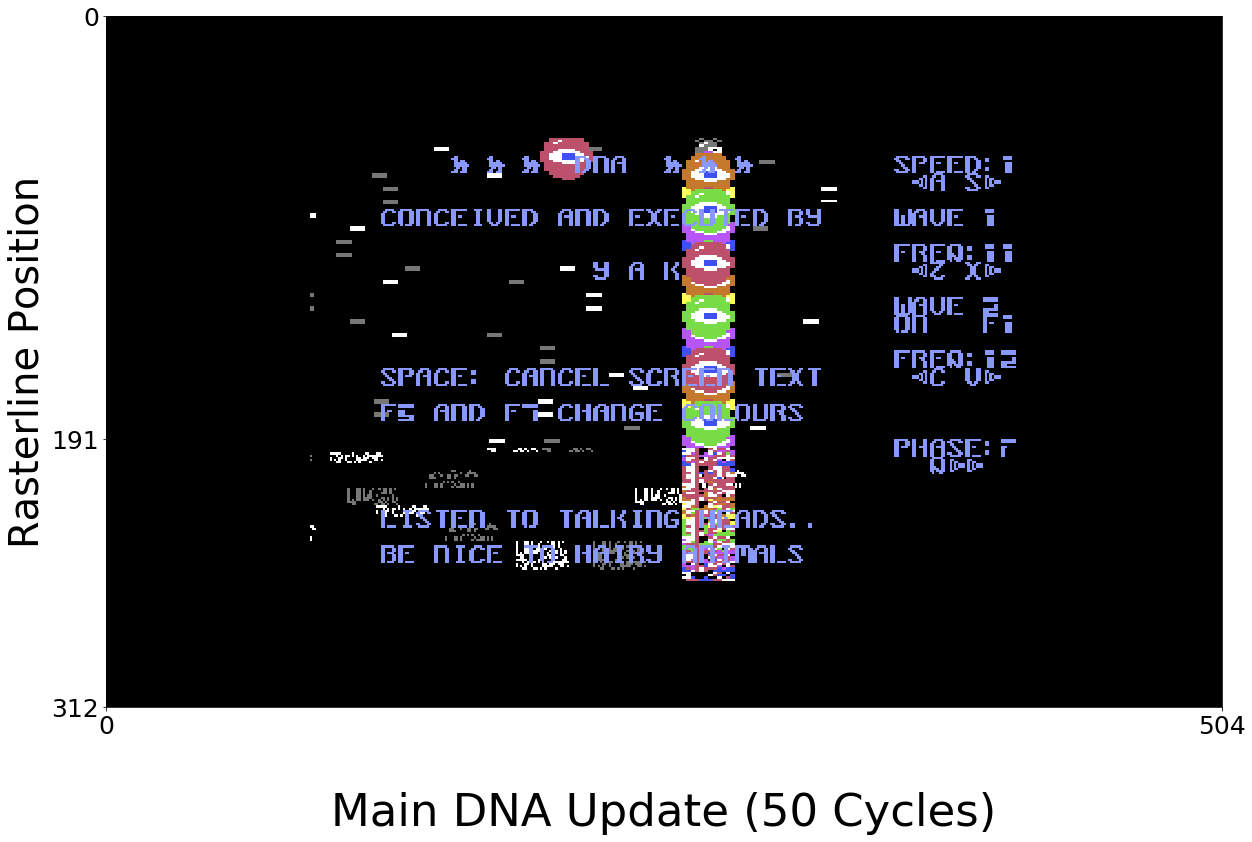

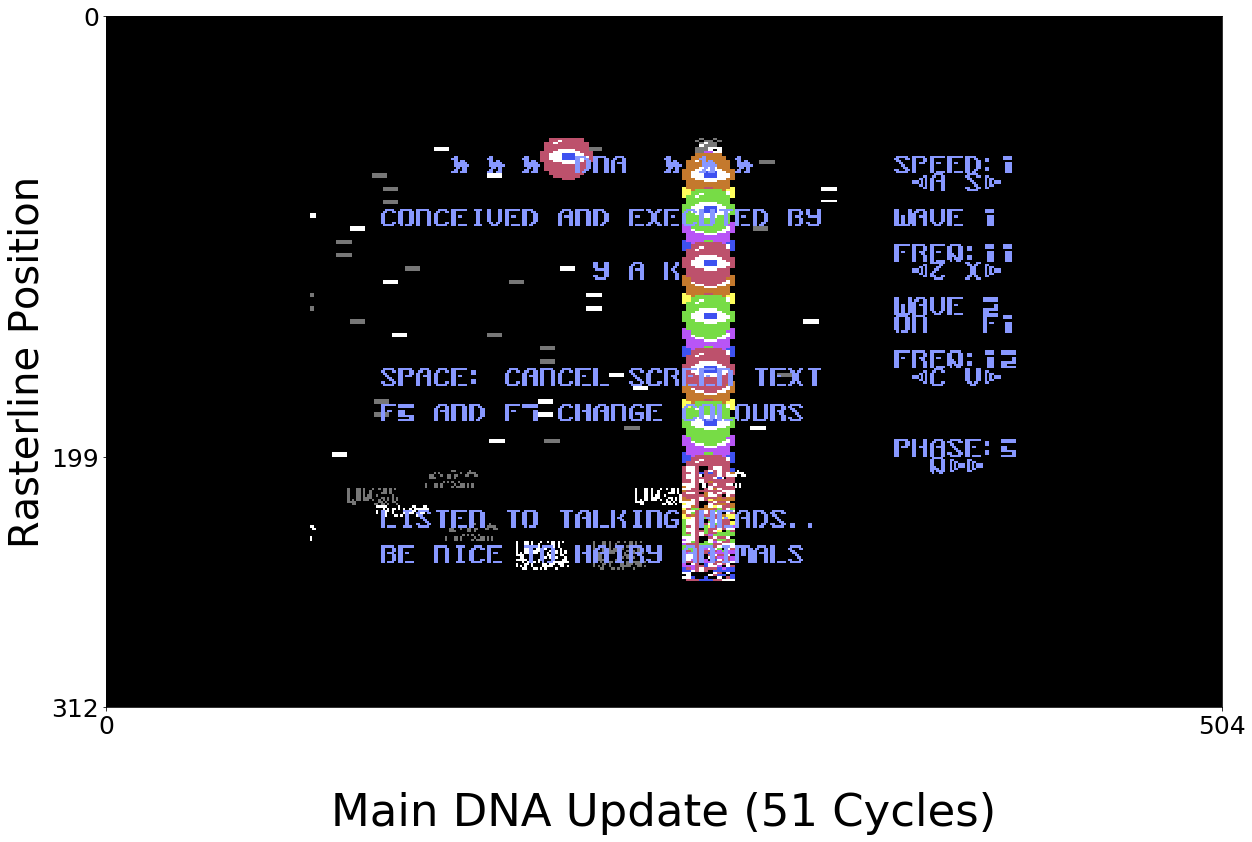

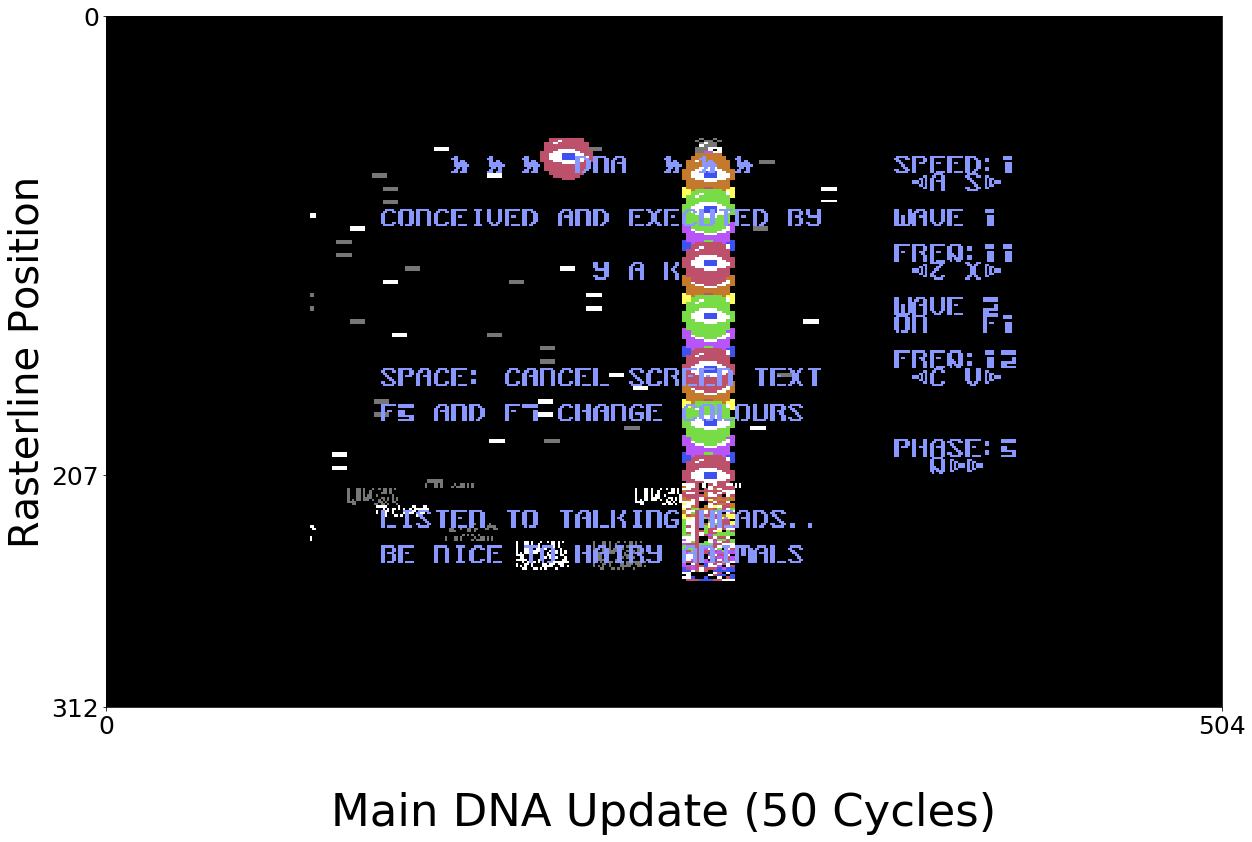

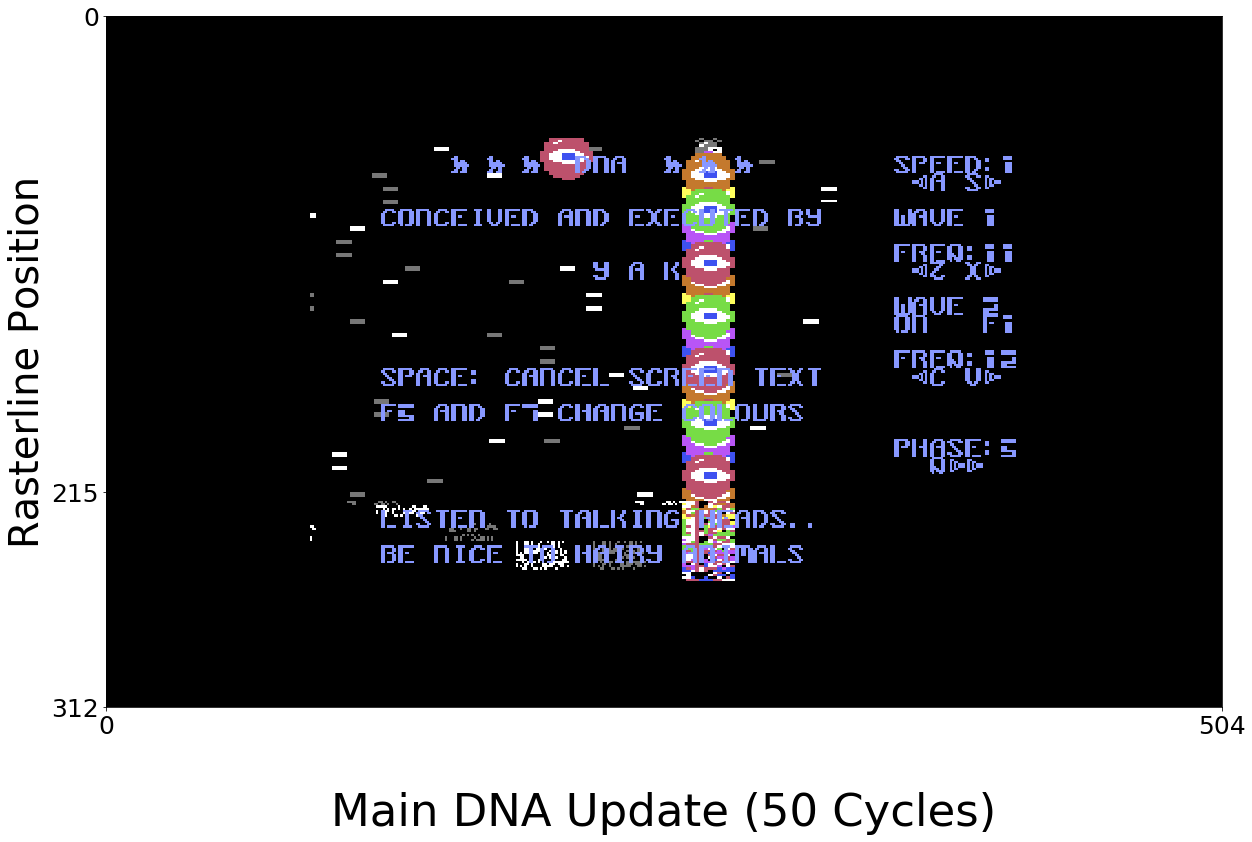

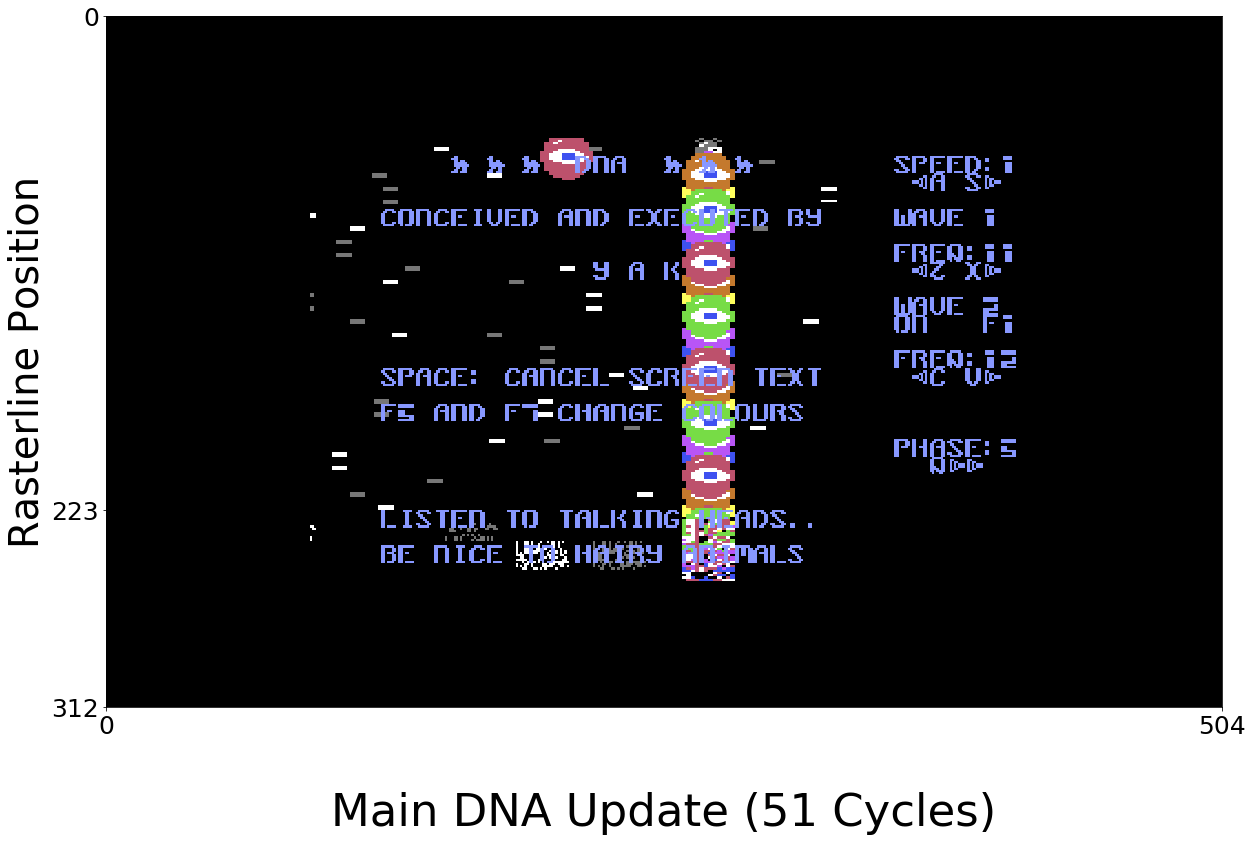

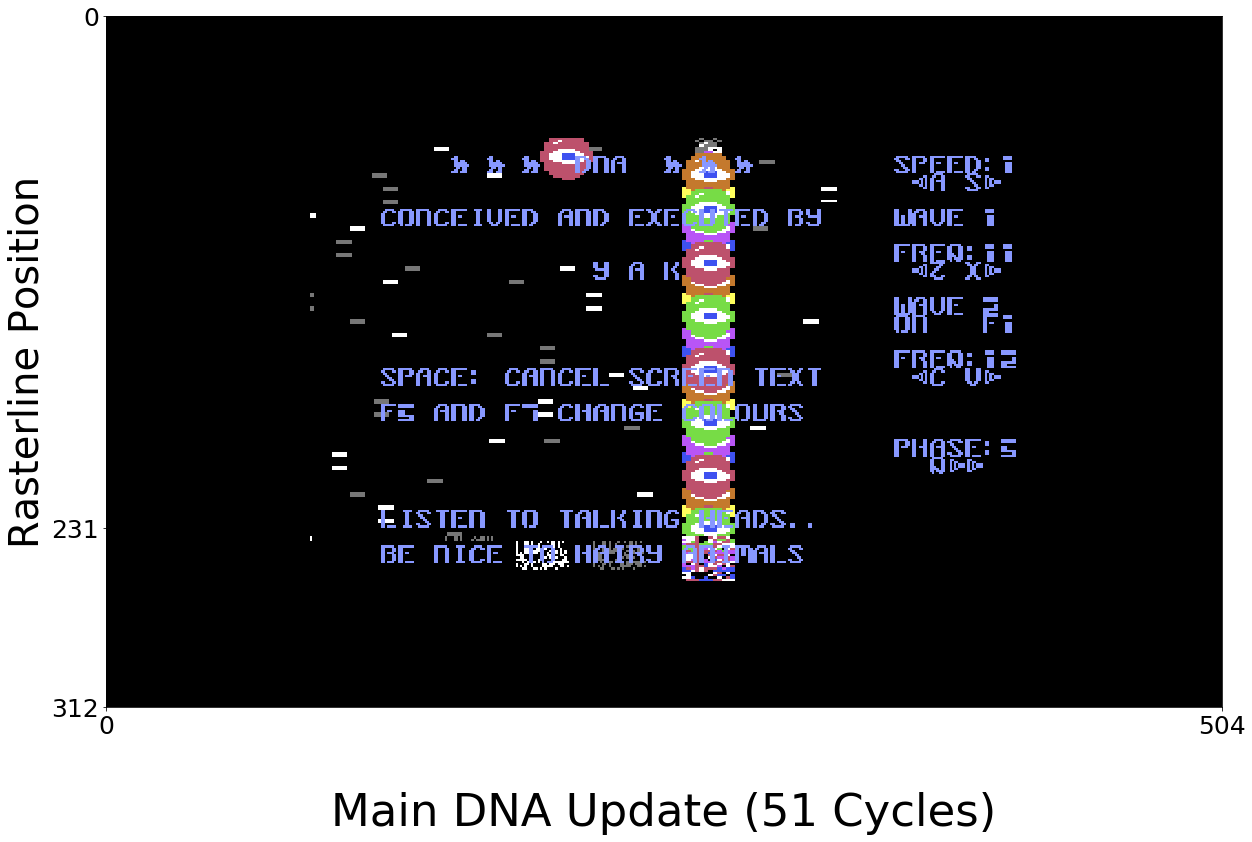

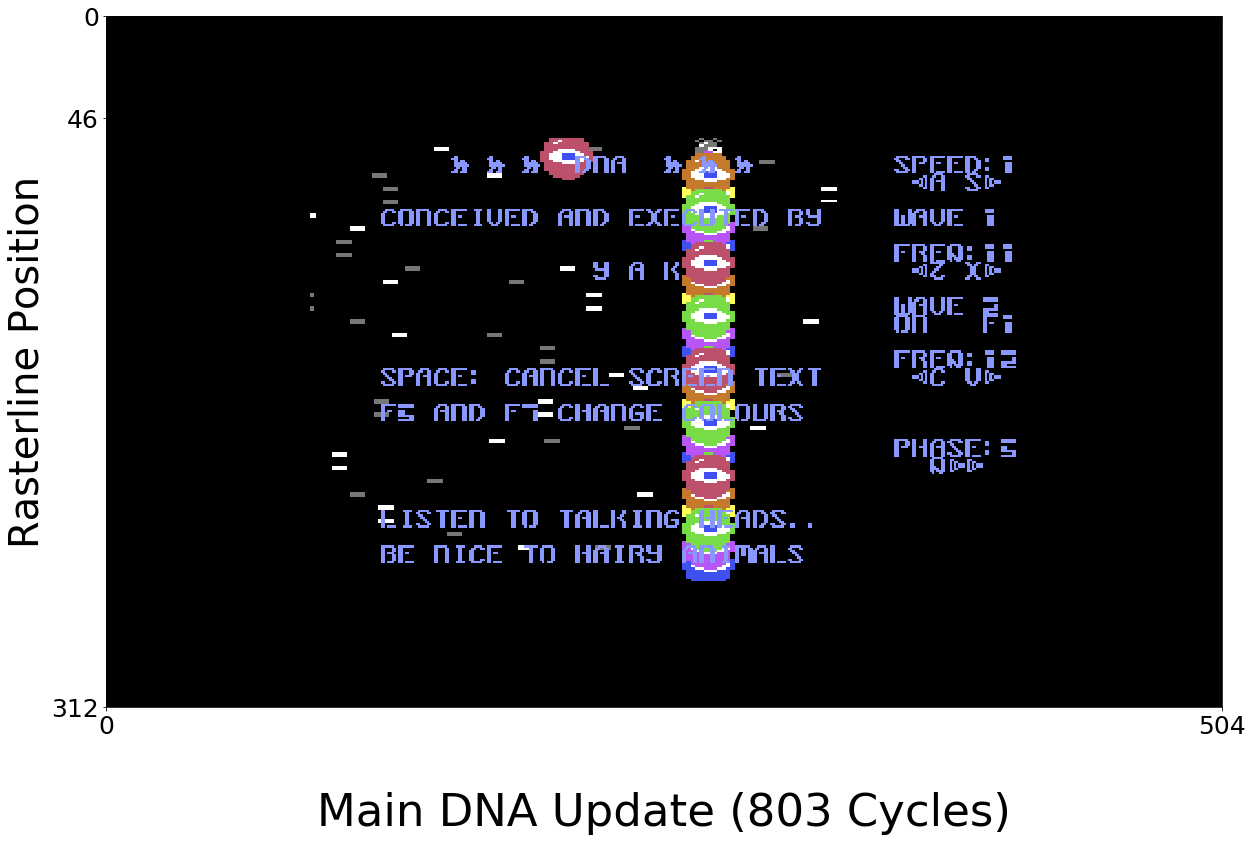

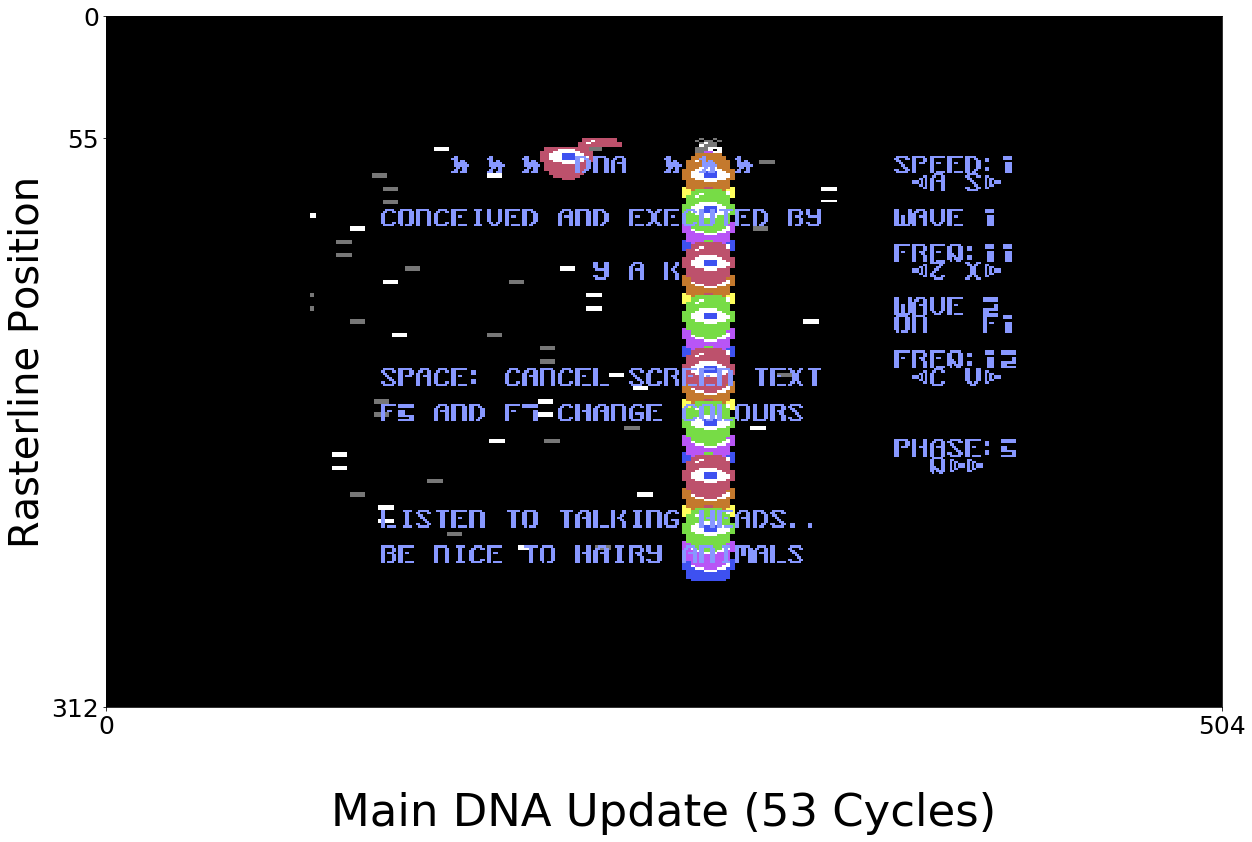

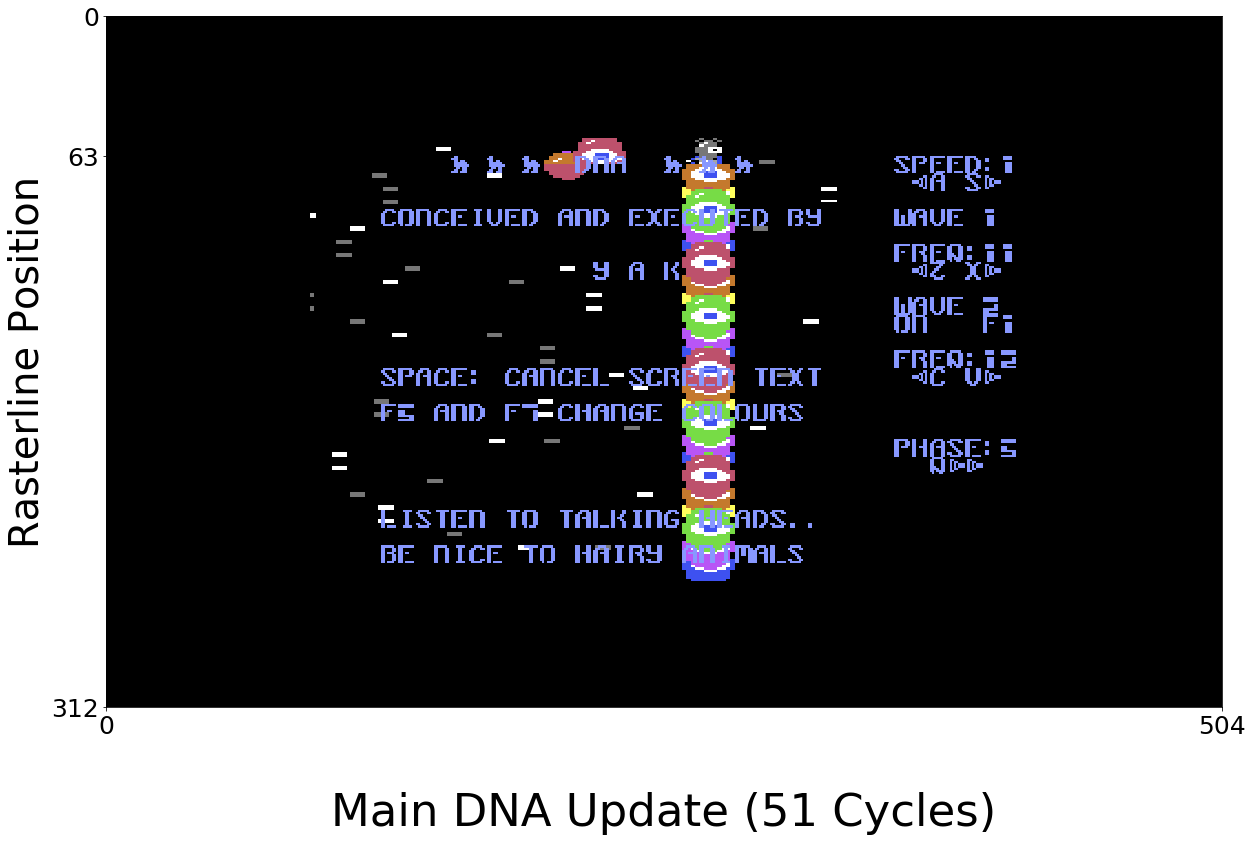

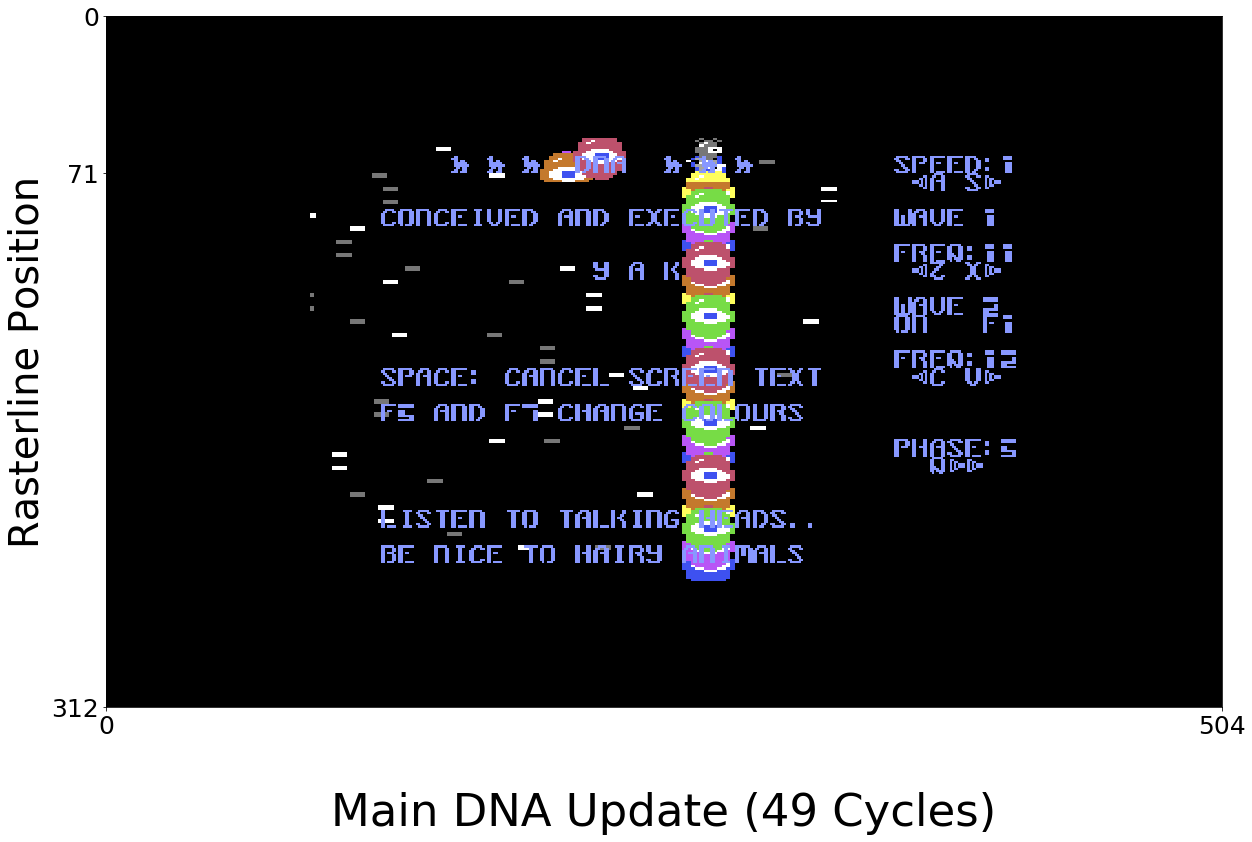

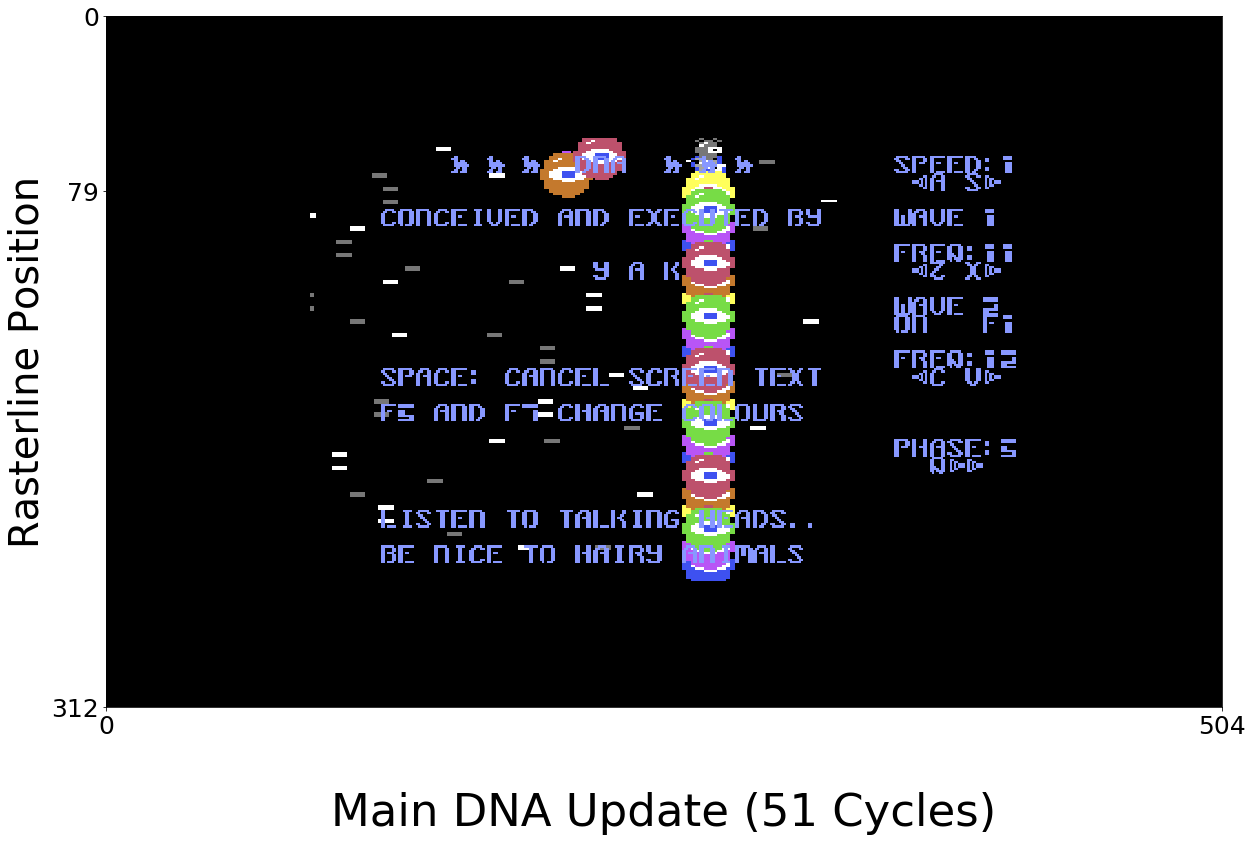

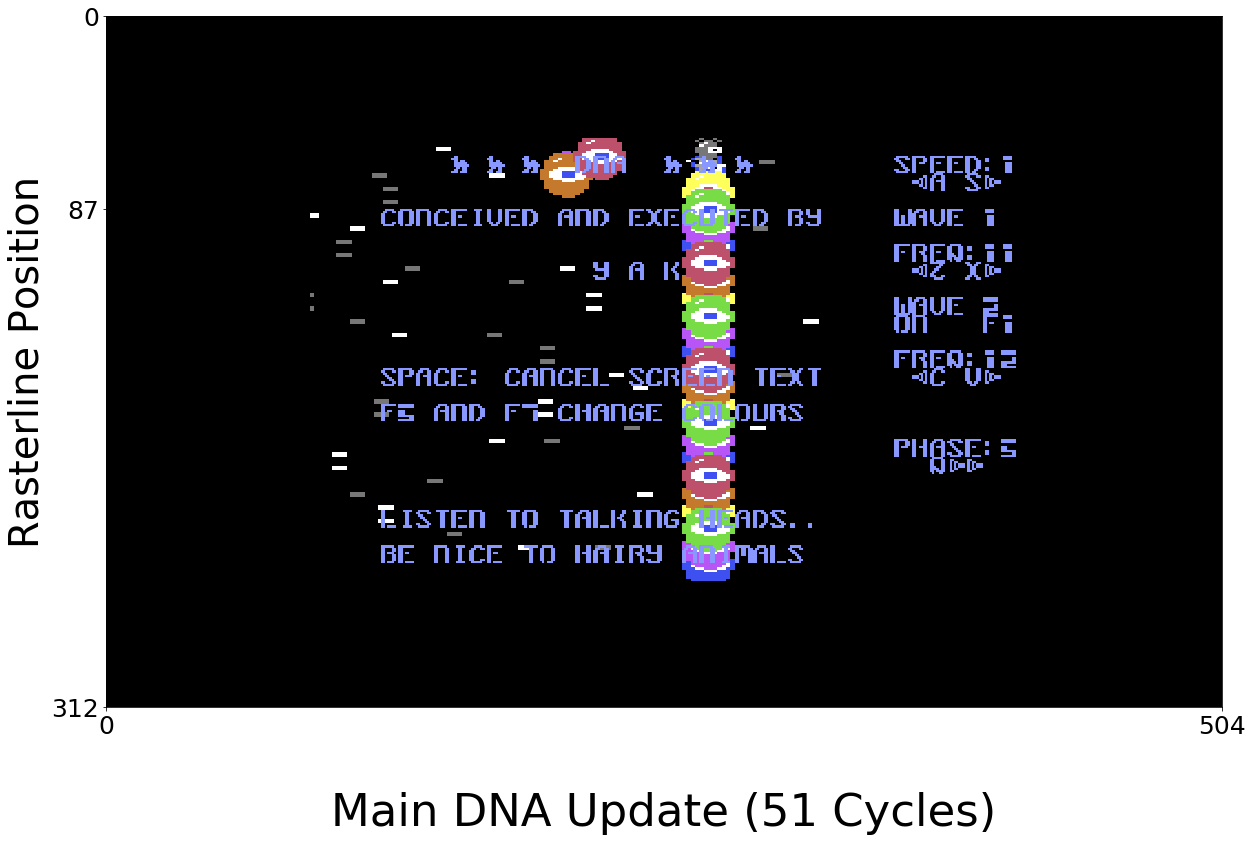

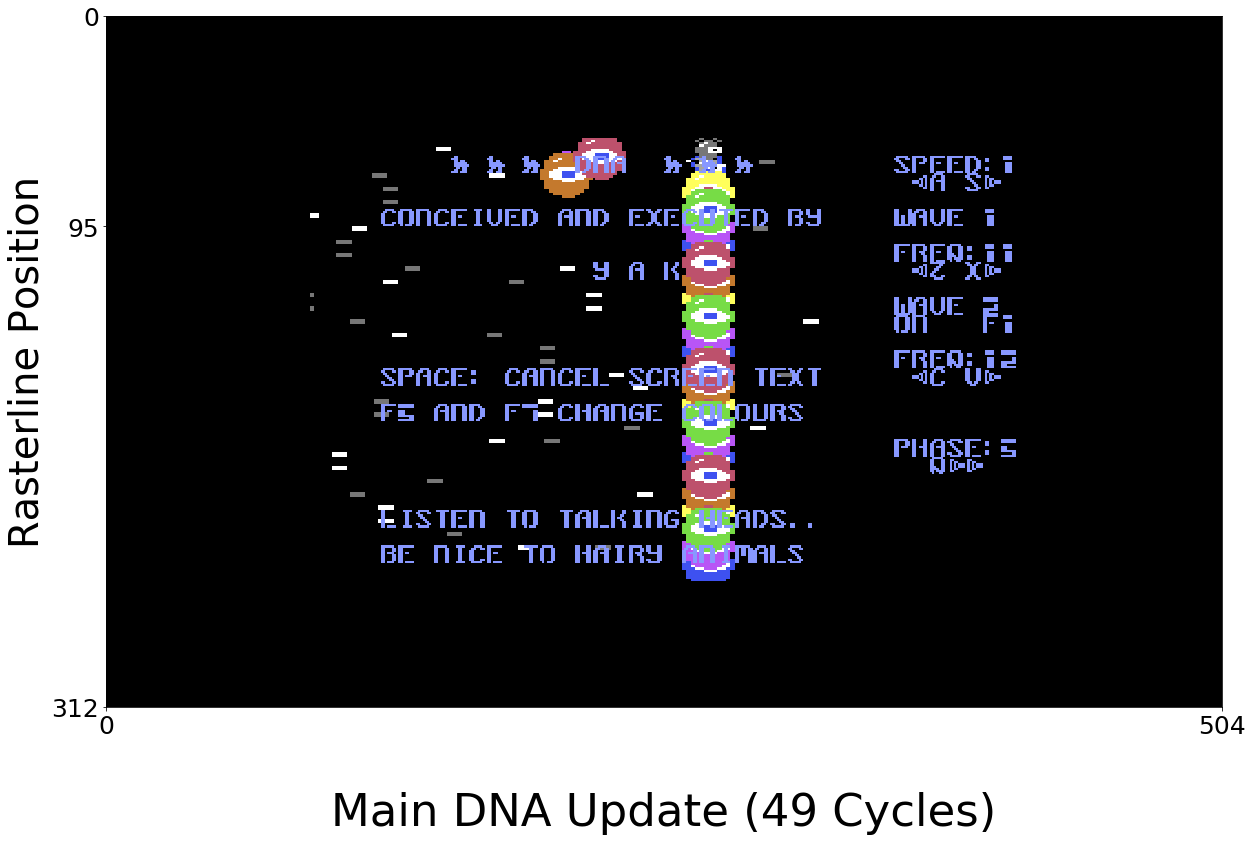

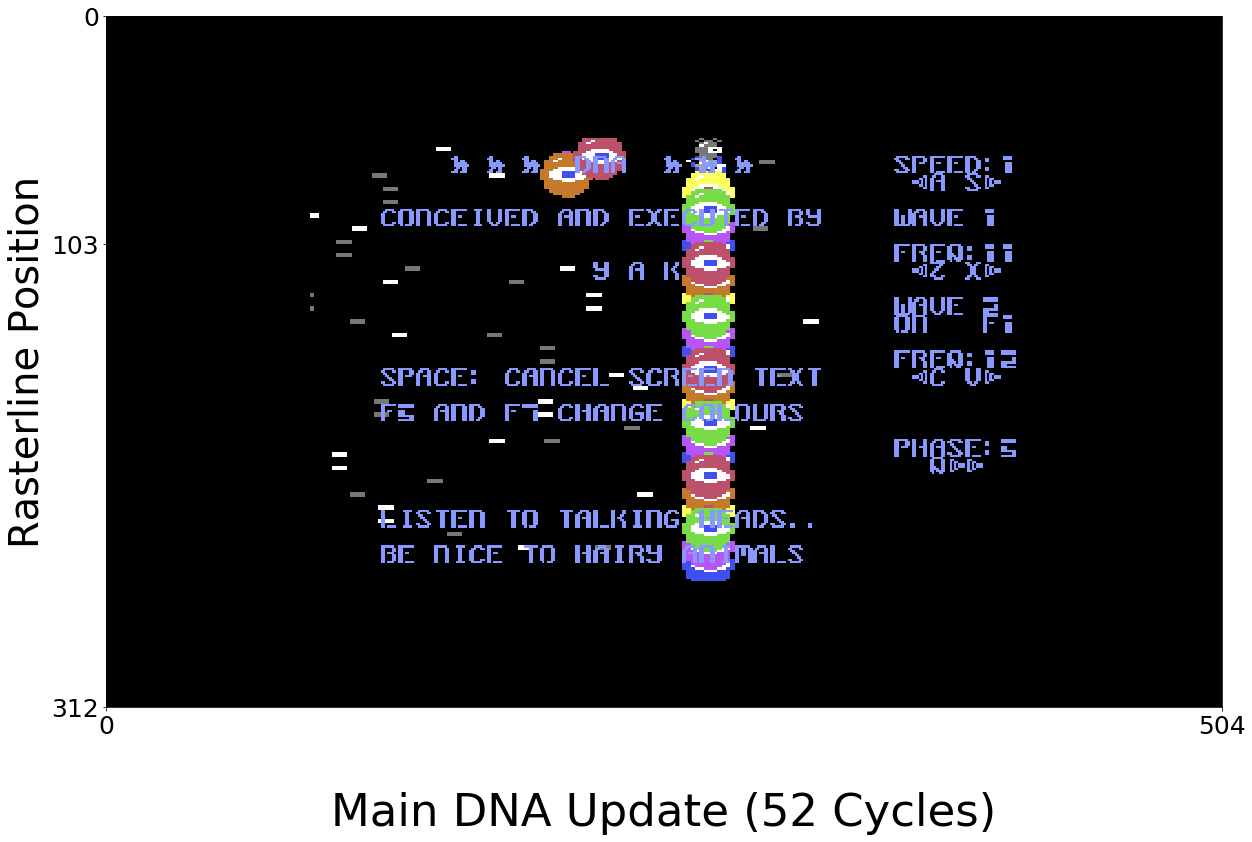

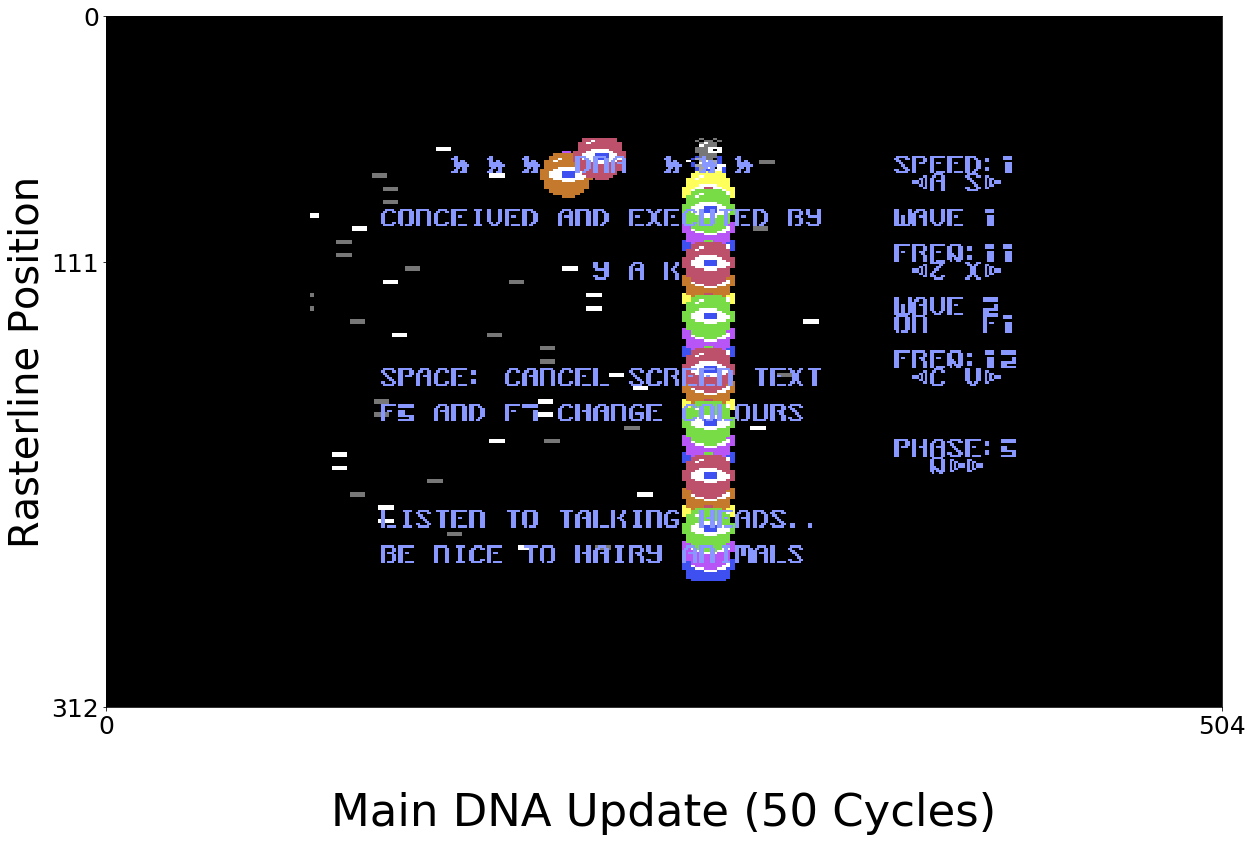

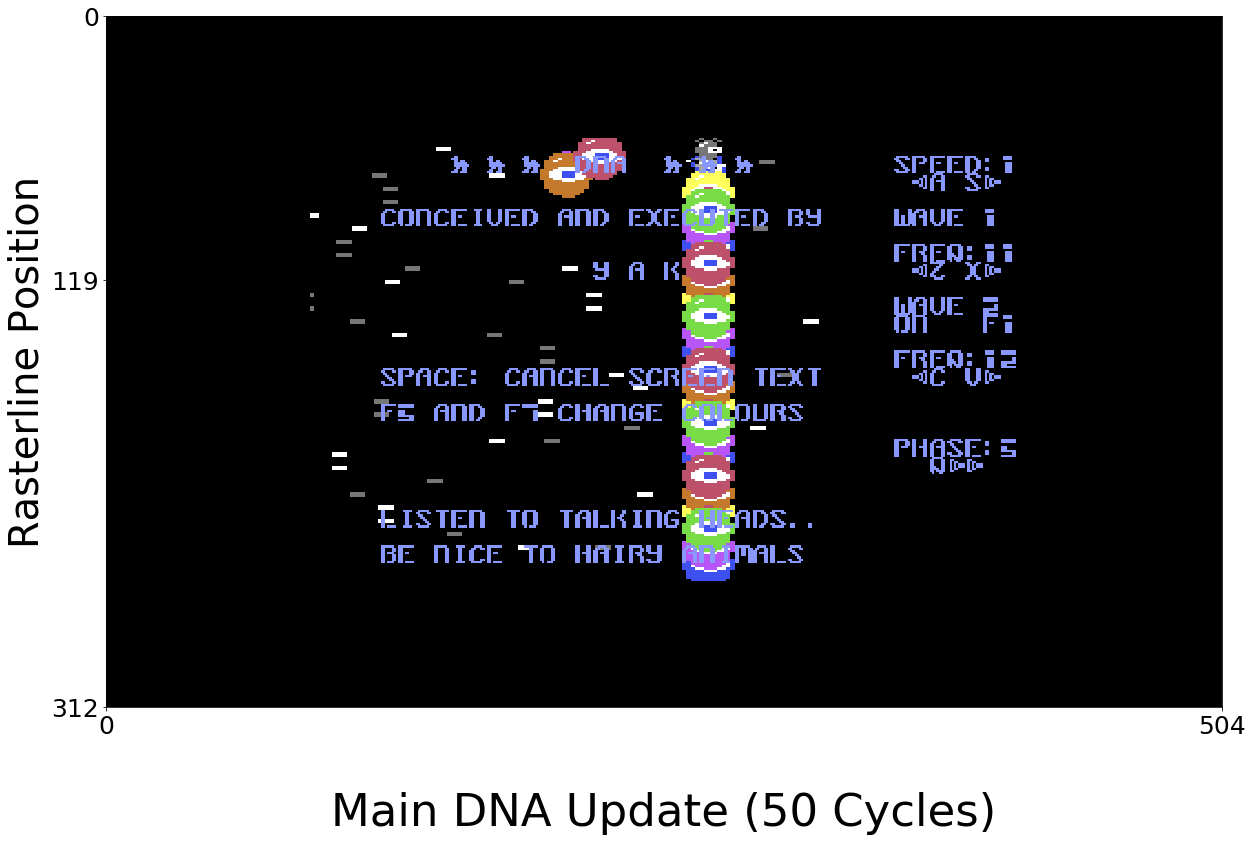

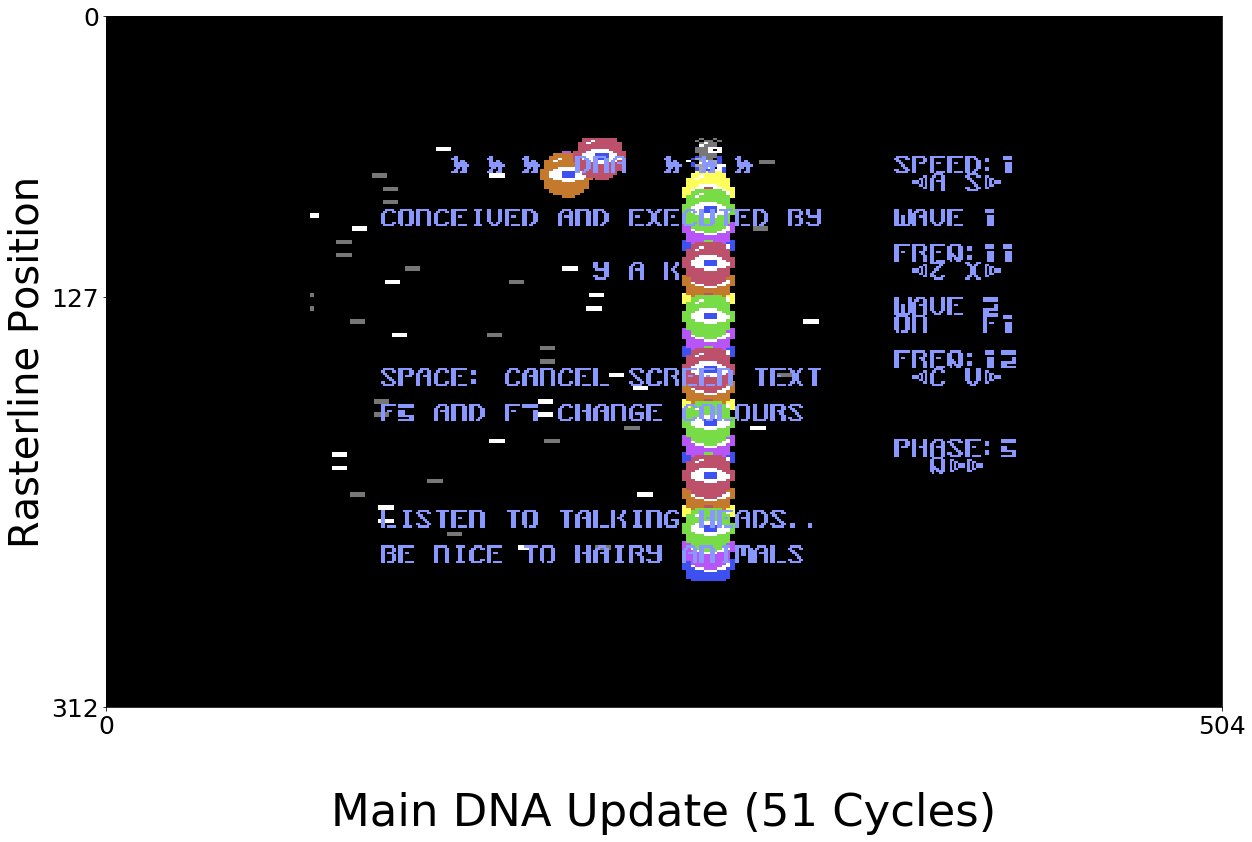

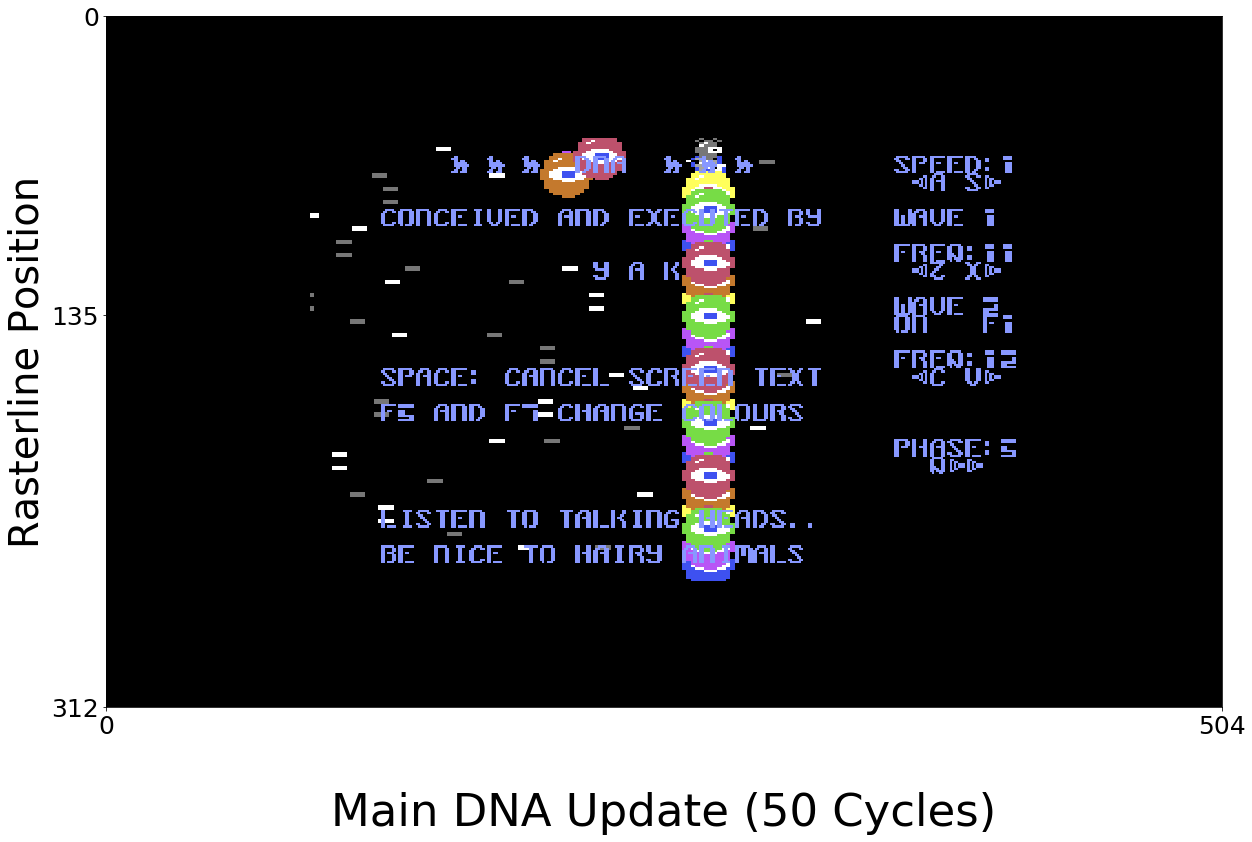

In [11]:
import imageio
from PIL import Image 

for routine, raster, cycles, file_name in routine_history[1:60]:
    img = Image.open(file_name)
    background = Image.new('RGB', (504,312), "black")
    background.paste(img, (60,20))

    ylabel = f"{routine} ({cycles} Cycles)"
    plt = createGraph(background, ylabel, raster, label_size=25)
    plt.savefig(f"../src/{file_name}", bbox_inches="tight")
